---
## 📁 Proyecto Métodos de Machine Learning Bioestadística
### Métodos de Machine Learning Bioestadística - 2025-2
### Integrantes:

Diego Fernando Naranjo Polania - dnaranjop@unbosque.edu.co <br>
Johan Steven Mahecha Cobos - jsmahecha@unbosque.edu.co <br>
Rafael Eduardo Montenegro Gonzalez - rmontenegro@unbosque.edu.co


Origen de la base de datos: https://www.kaggle.com/datasets/aadarshvelu/liver-cirrhosis-stage-classification

# **Clasificación de los estadios de la cirrosis hepática**

Enlace: https://www.kaggle.com/datasets/aadarshvelu/liver-cirrhosis-stage-classification



In [133]:
# Cargue de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score



import warnings
warnings.filterwarnings("ignore")

### **Cargue de Datos**

In [134]:
# Instalar kagglehub y configurar Kaggle API
!pip install kagglehub[pandas-datasets]

In [135]:
import kagglehub
import os
# Descargar el dataset
path = kagglehub.dataset_download("aadarshvelu/liver-cirrhosis-stage-classification")
print("Ruta local del dataset:", path)

Ruta local del dataset: /kaggle/input/liver-cirrhosis-stage-classification


In [136]:
# Ver los archivos del dataset cargado
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/liver-cirrhosis-stage-classification/liver_cirrhosis.csv


# **1. Análisis exploratorio de datos**

## **Variables:**

*   N_Days: Número de días transcurridos entre el registro y la fecha más temprana entre fallecimiento, trasplante o análisis del estudio en 1986.
*   Status: estado del paciente C (censurado), CL (censurado por tratamiento hepático) o D (fallecimiento).
*   Drug: tipo de fármaco: D-penicilamina o placebo.
*   Age: edad en días.
*   Sex: M (hombre) o F (mujer).
*   Ascites: presencia de ascitis N (No) o Y (Sí).
*   Hepatomegaly: presencia de hepatomegalia N (No) o Y (Sí).
*   Spiders: presencia de aracnosis N (No) o Y (Sí).
*   Edema: presencia de edema N (sin edema ni tratamiento diurético para el edema), S (edema presente sin diuréticos o edema resuelto con diuréticos) o Y (edema a pesar del tratamiento diurético).
*   Bilirubin: bilirrubina sérica en mg/dl.
*   Cholesterol: colesterol sérico en [mg/dl]
*   Albumin: albúmina en [g/dl]
*   Copper: cobre en orina en [ug/día]
*   Alk_Phos: fosfatasa alcalina en [U/litro]
*   SGOT: SGOT en [U/ml]
*   Tryglicerides: triglicéridos en [mg/dl]
*   Platelets: plaquetas por metro cúbico [ml/1000]
*   Prothrombin: tiempo de protrombina en segundos [s]
*   Stage: estadio histológico de la enfermedad (1, 2 o 3)

*   **Tamaño:** 25 000 filas, 19 columnas
*   **Faltantes:** 0% en todas las columnas

In [137]:
file_path = os.path.join(path, "liver_cirrhosis.csv")
df = pd.read_csv(file_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

### **Variables categóricas**

In [138]:
variables_categoricas = df.select_dtypes(include=["object", "category"]).columns.tolist()
variables_categoricas


['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [139]:
for col in variables_categoricas:
    df[col] = df[col].astype('category')

In [140]:
df['Stage'] = pd.to_numeric(df['Stage'], errors='coerce')
df['Stage'] = pd.Categorical(df['Stage'], ordered=True)
df.info()
df['Stage'].dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   N_Days         25000 non-null  int64   
 1   Status         25000 non-null  category
 2   Drug           25000 non-null  category
 3   Age            25000 non-null  int64   
 4   Sex            25000 non-null  category
 5   Ascites        25000 non-null  category
 6   Hepatomegaly   25000 non-null  category
 7   Spiders        25000 non-null  category
 8   Edema          25000 non-null  category
 9   Bilirubin      25000 non-null  float64 
 10  Cholesterol    25000 non-null  float64 
 11  Albumin        25000 non-null  float64 
 12  Copper         25000 non-null  float64 
 13  Alk_Phos       25000 non-null  float64 
 14  SGOT           25000 non-null  float64 
 15  Tryglicerides  25000 non-null  float64 
 16  Platelets      25000 non-null  float64 
 17  Prothrombin    25000 non-null  

CategoricalDtype(categories=[1, 2, 3], ordered=True, categories_dtype=int64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   N_Days         25000 non-null  int64   
 1   Status         25000 non-null  category
 2   Drug           25000 non-null  category
 3   Age            25000 non-null  int64   
 4   Sex            25000 non-null  category
 5   Ascites        25000 non-null  category
 6   Hepatomegaly   25000 non-null  category
 7   Spiders        25000 non-null  category
 8   Edema          25000 non-null  category
 9   Bilirubin      25000 non-null  float64 
 10  Cholesterol    25000 non-null  float64 
 11  Albumin        25000 non-null  float64 
 12  Copper         25000 non-null  float64 
 13  Alk_Phos       25000 non-null  float64 
 14  SGOT           25000 non-null  float64 
 15  Tryglicerides  25000 non-null  float64 
 16  Platelets      25000 non-null  float64 
 17  Prothrombin    25000 non-null  

CategoricalDtype(categories=[1, 2, 3], ordered=True, categories_dtype=int64)

In [141]:
variables_categoricas = df.select_dtypes(include=["object", "category"]).columns.tolist()
variables_categoricas
for col in variables_categoricas:
    print(f"\n📊 Conteo de categorías para '{col}':")
    print(df[col].value_counts(dropna=False))  # Incluye NaN si los hay


📊 Conteo de categorías para 'Status':
Status
C     13516
D      9456
CL     2028
Name: count, dtype: int64

📊 Conteo de categorías para 'Drug':
Drug
Placebo            15827
D-penicillamine     9173
Name: count, dtype: int64

📊 Conteo de categorías para 'Sex':
Sex
F    22137
M     2863
Name: count, dtype: int64

📊 Conteo de categorías para 'Ascites':
Ascites
N    16798
Y     8202
Name: count, dtype: int64

📊 Conteo de categorías para 'Hepatomegaly':
Hepatomegaly
N    15243
Y     9757
Name: count, dtype: int64

📊 Conteo de categorías para 'Spiders':
Spiders
N    13614
Y    11386
Name: count, dtype: int64

📊 Conteo de categorías para 'Edema':
Edema
N    20220
S     3698
Y     1082
Name: count, dtype: int64

📊 Conteo de categorías para 'Stage':
Stage
2    8441
3    8294
1    8265
Name: count, dtype: int64


**Resumen participación variables categóricas**

In [142]:
resumen_cat = []

for col in variables_categoricas:
    conteos = df[col].value_counts(dropna=False)
    total = len(df)
    for categoria, conteo in conteos.items():
        porcentaje = round(conteo / total * 100, 2)
        resumen_cat.append({
            "Variable": col,
            "Categoria": categoria,
            "Conteo": conteo,
            "Porcentaje (%)": porcentaje
        })

tabla_resumen = pd.DataFrame(resumen_cat)

tabla_resumen = tabla_resumen.sort_values(["Variable", "Porcentaje (%)"], ascending=[True, False])

print(tabla_resumen)

        Variable        Categoria  Conteo  Porcentaje (%)
7        Ascites                N   16798           67.19
8        Ascites                Y    8202           32.81
3           Drug          Placebo   15827           63.31
4           Drug  D-penicillamine    9173           36.69
13         Edema                N   20220           80.88
14         Edema                S    3698           14.79
15         Edema                Y    1082            4.33
9   Hepatomegaly                N   15243           60.97
10  Hepatomegaly                Y    9757           39.03
5            Sex                F   22137           88.55
6            Sex                M    2863           11.45
11       Spiders                N   13614           54.46
12       Spiders                Y   11386           45.54
16         Stage                2    8441           33.76
17         Stage                3    8294           33.18
18         Stage                1    8265           33.06
0         Stat

Hay desbalance importante en la variable sexo.

Algunas variables clínicas (Ascites, Hepatomegaly, Spiders, Edema) muestran proporciones relevantes de presencia, lo que podría aportar señal para diferenciar etapas de la enfermedad.

Stage está balanceada, lo que es favorable para clasificación multiclase.

### **Variables numéricas**

In [143]:
variables_num = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
variables_num

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

In [144]:
for col in variables_num:
    print(f"\n📊 Conteo de datos para '{col}':")
    print(df[col].value_counts(dropna=False))  # Incluye NaN si los hay


📊 Conteo de datos para 'N_Days':
N_Days
1170    409
1301    323
2475    291
1067    280
3099    215
       ... 
457       1
1517      1
354       1
2597      1
45        1
Name: count, Length: 549, dtype: int64

📊 Conteo de datos para 'Age':
Age
18993    493
19724    465
23011    411
18263    323
22646    295
        ... 
14215      1
11904      1
17185      1
11281      1
17107      1
Name: count, Length: 510, dtype: int64

📊 Conteo de datos para 'Bilirubin':
Bilirubin
0.7     1868
0.8     1652
0.6     1611
0.5     1425
1.1     1334
        ... 
11.8       1
10.4       1
11.6       1
5.8        1
17.0       1
Name: count, Length: 113, dtype: int64

📊 Conteo de datos para 'Cholesterol':
Cholesterol
369.510563     8310
248.000000      396
310.000000      323
432.000000      303
448.000000      296
               ... 
661.000000        1
319.000000        1
1072.000000       1
724.000000        1
148.000000        1
Name: count, Length: 220, dtype: int64

📊 Conteo de datos para 'Albumin

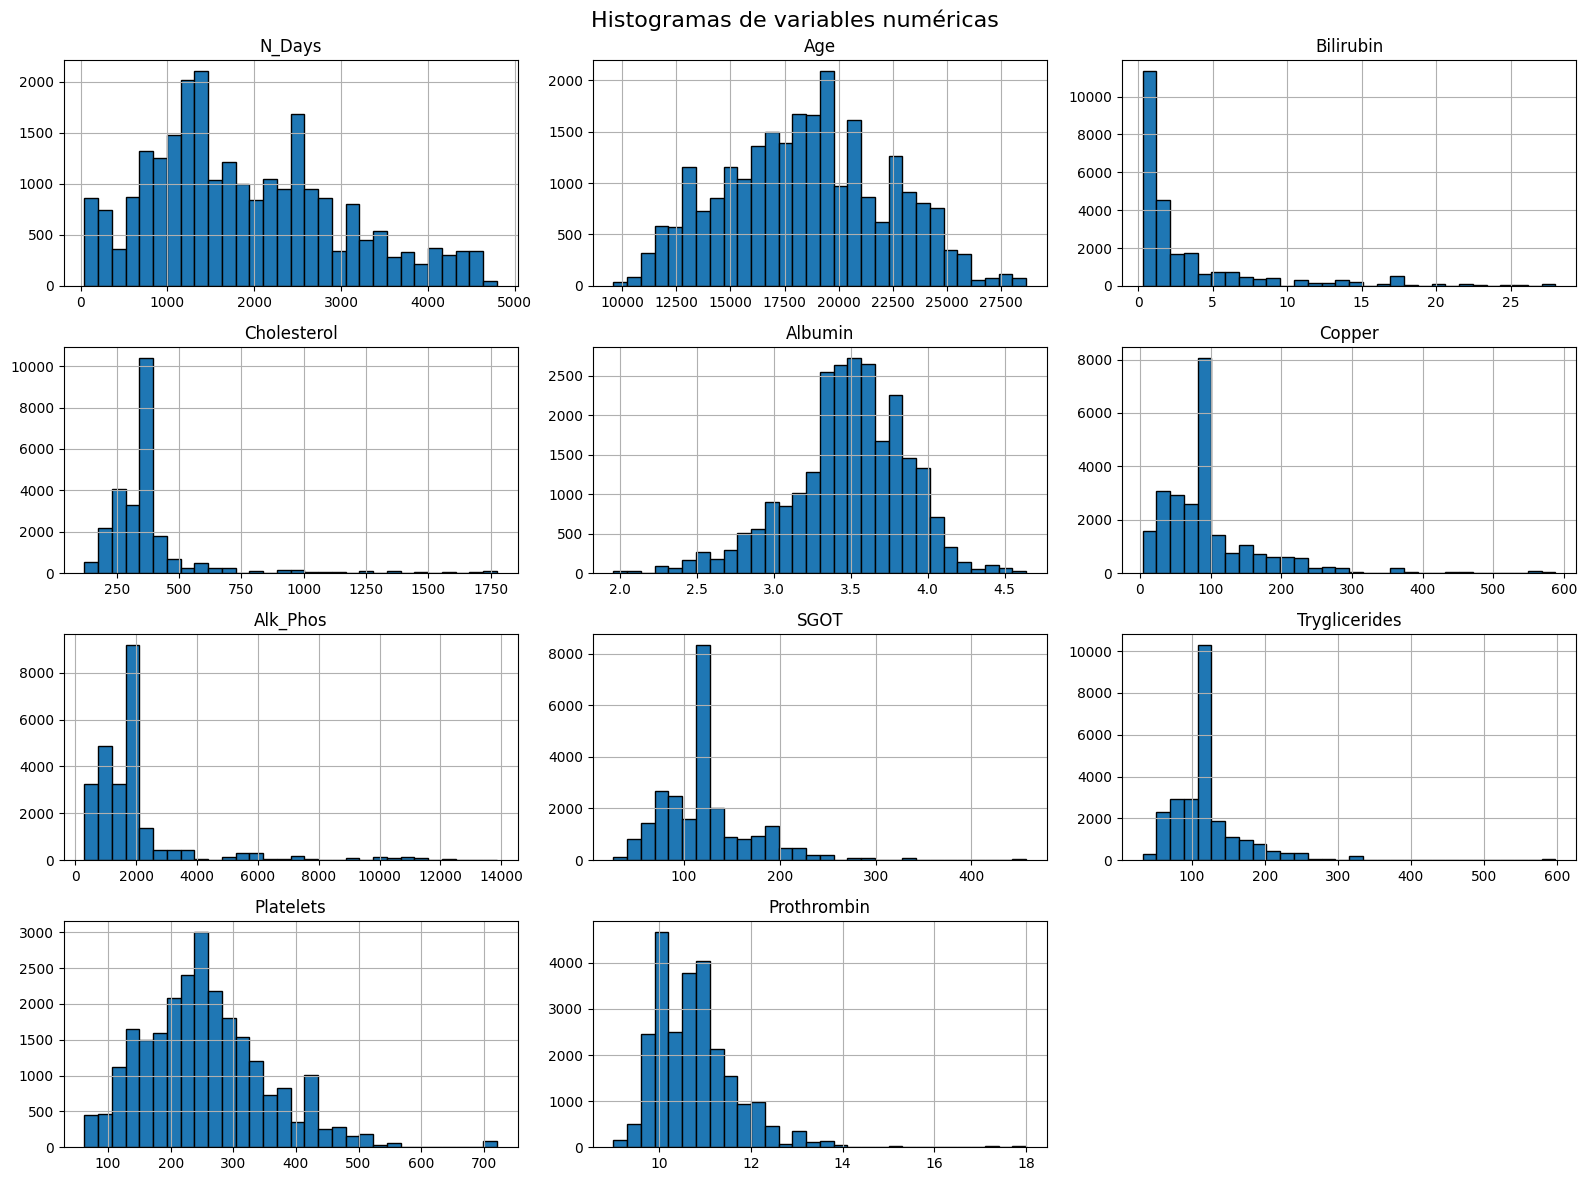

In [145]:
df.hist(bins=30, figsize=(16, 12), edgecolor='black')
plt.suptitle('Histogramas de variables numéricas', fontsize=16)
plt.tight_layout()
plt.show()

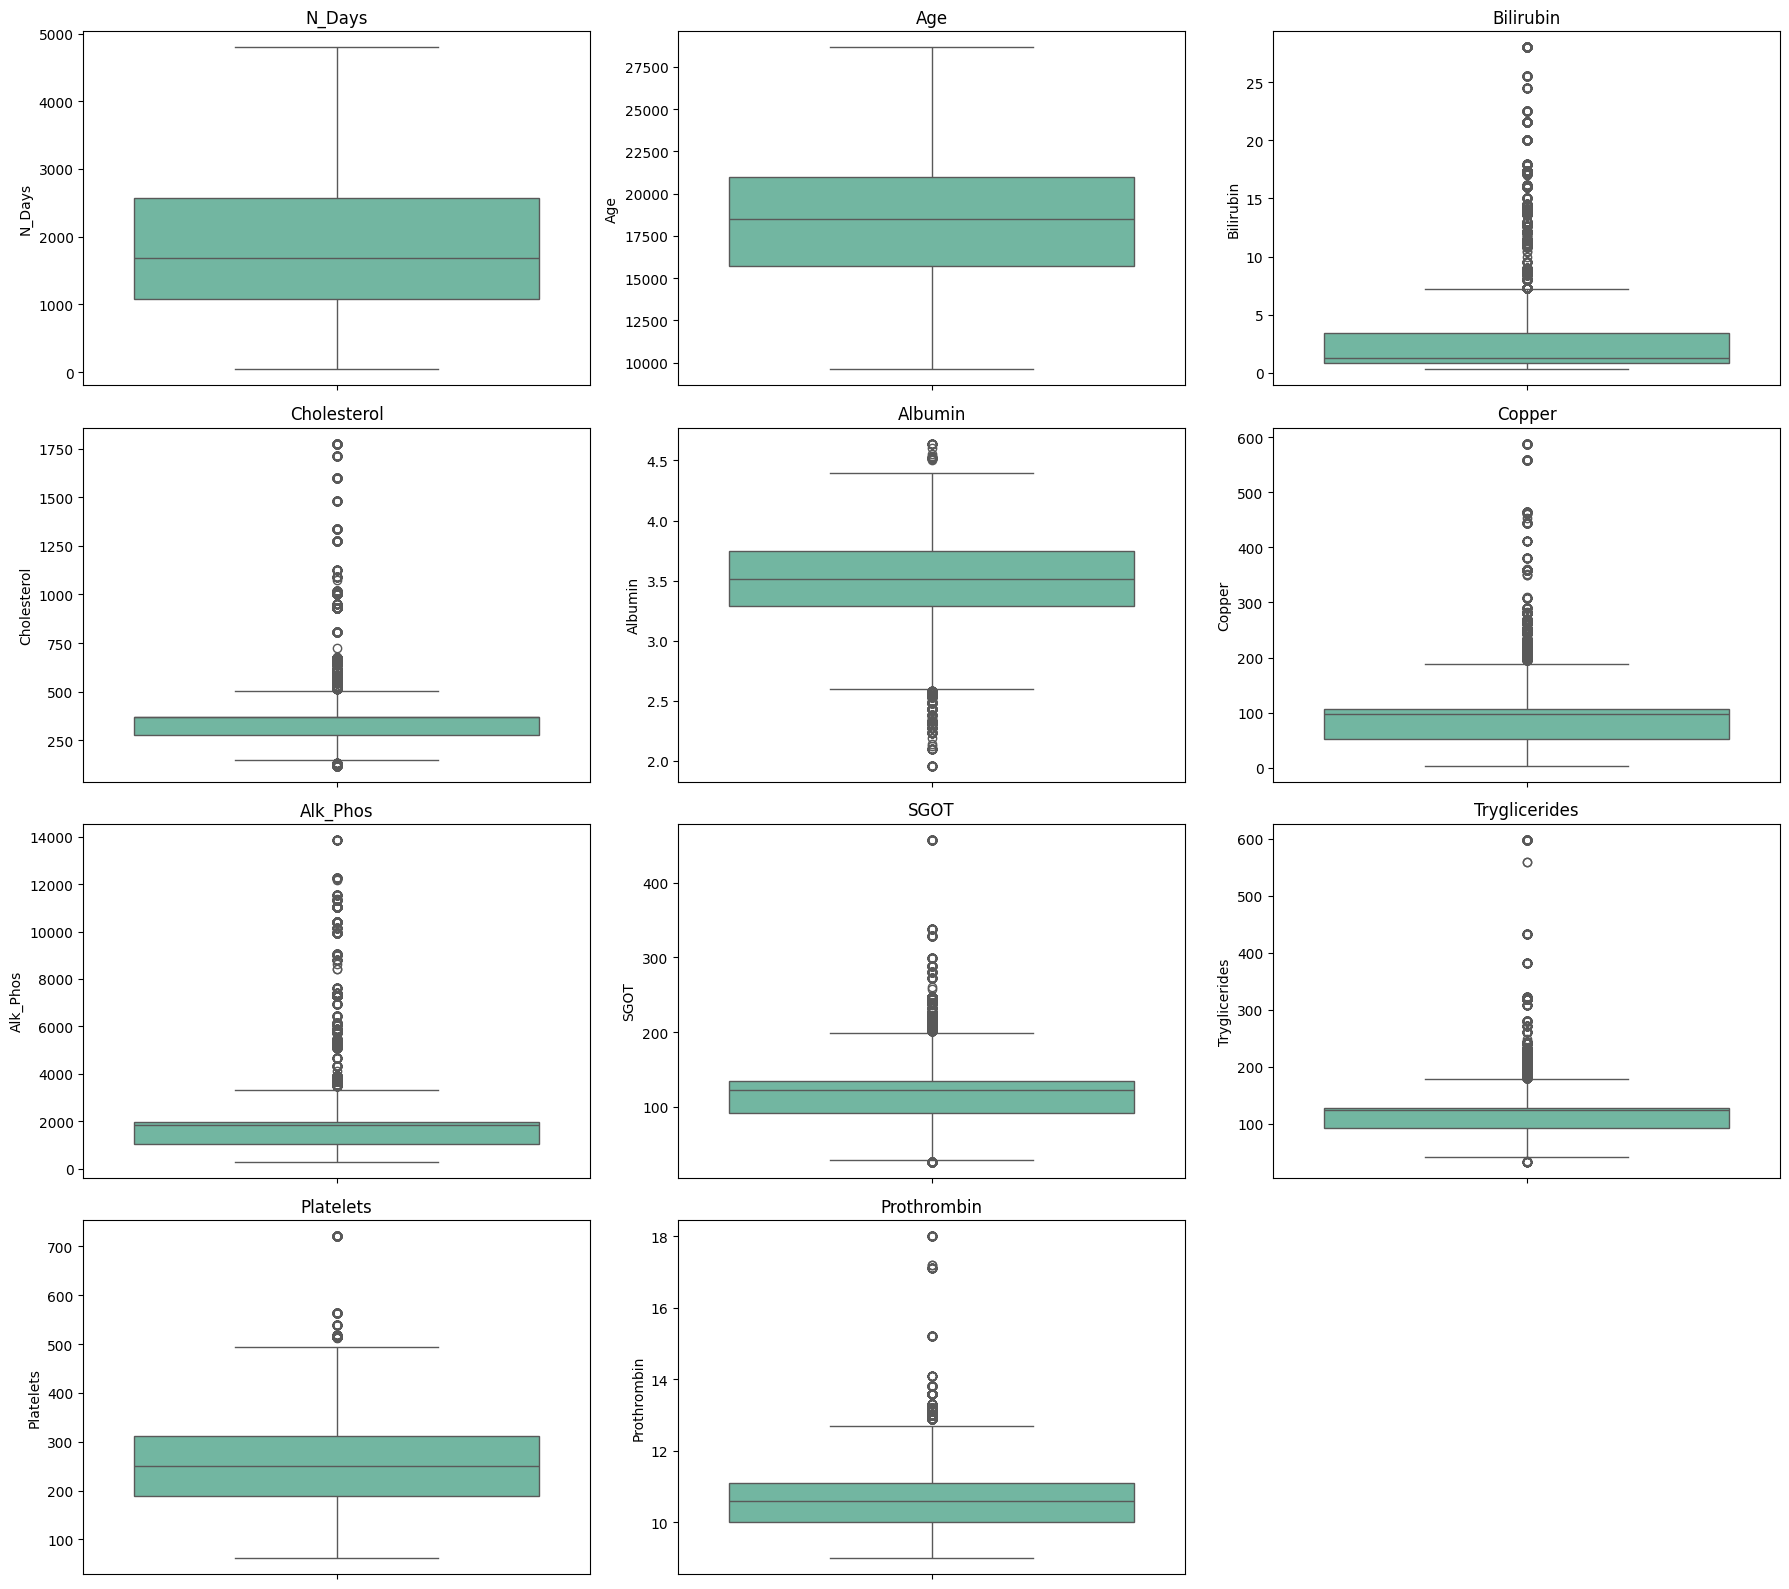

In [146]:
import math
n_cols = 3
n_rows = math.ceil(len(variables_num) / n_cols)

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(variables_num, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=col, data=df, palette="Set2")
    plt.title(f"{col}")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [147]:
df.describe()


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000


**Análisis de variables numéricas**

**Distribuciónes simetricas:** Age, Albumin, Platelets, Prothrombin muestran forma cercana a campana, aunque con cierta asimetría ligera.

**Sesgo a la derecha (asimetría positiva):**

Bilirubin, Cholesterol, Copper, Alk_Phos, SGOT, Triglycerides presentan concentración de valores bajos y colas largas hacia la derecha, indicando posibles outliers y variabilidad elevada.

N_Days tiene ligera asimetría derecha.

Posibles outliers extremos:
Evidentes en Bilirubin (>20), Cholesterol (>1500), Alk_Phos (>10000), Copper (>500), SGOT (>400).


En las variables bioquímicas, Bilirubin muestra una fuerte asimetría a la derecha, con valores entre 0,3 y 28 mg/dL y un promedio de 3,40 mg/dL, indicando la presencia de posibles valores atípicos. Cholesterol presenta un promedio de 372 mg/dL y una alta dispersión (DE ≈ 193,7), alcanzando un máximo de 1775 mg/dL. Albumin es más estable, con valores concentrados entre 1,96 y 4,64 g/dL y mediana de 3,51 g/dL. Copper y Alk_Phos muestran también gran variabilidad y asimetría, especialmente Alk_Phos, que alcanza un máximo de 13862,4 U/L. La enzima SGOT presenta un rango de 26,35 a 457,25 U/L, con una media de 123,17 U/L. Tryglicerides tiene un promedio de 123,82 mg/dL, aunque con casos extremos hasta 598 mg/dL. El recuento de plaquetas (Platelets) es en promedio 256 × 10³/µL, con un rango amplio (62 a 721 × 10³/µL), mientras que Prothrombin es más estable, con una media de 10,73 s y variación reducida (DE ≈ 0,90 s). En conjunto, varias variables muestran alta dispersión y sesgo positivo.

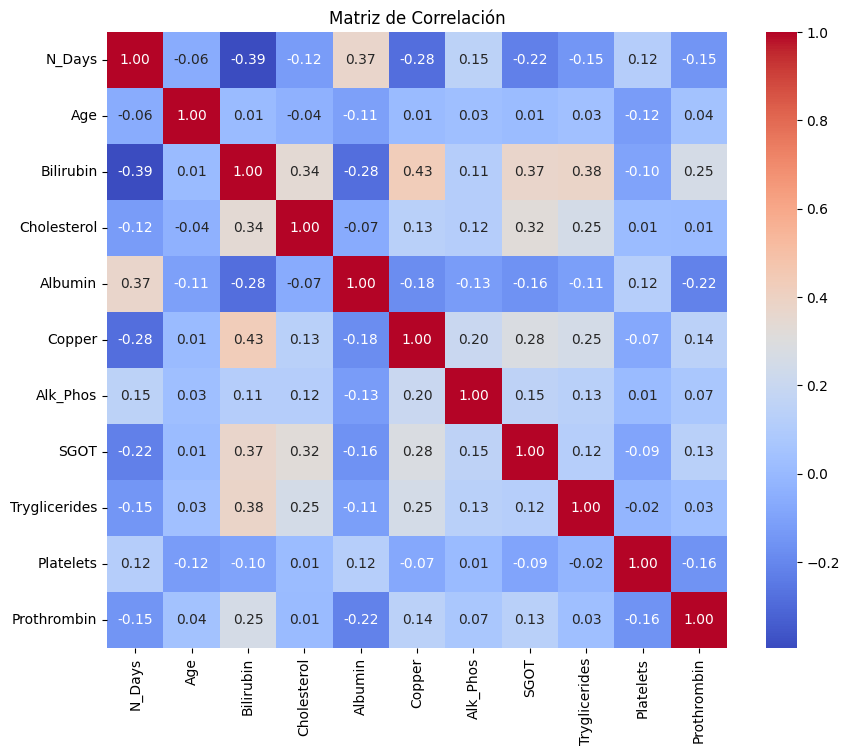

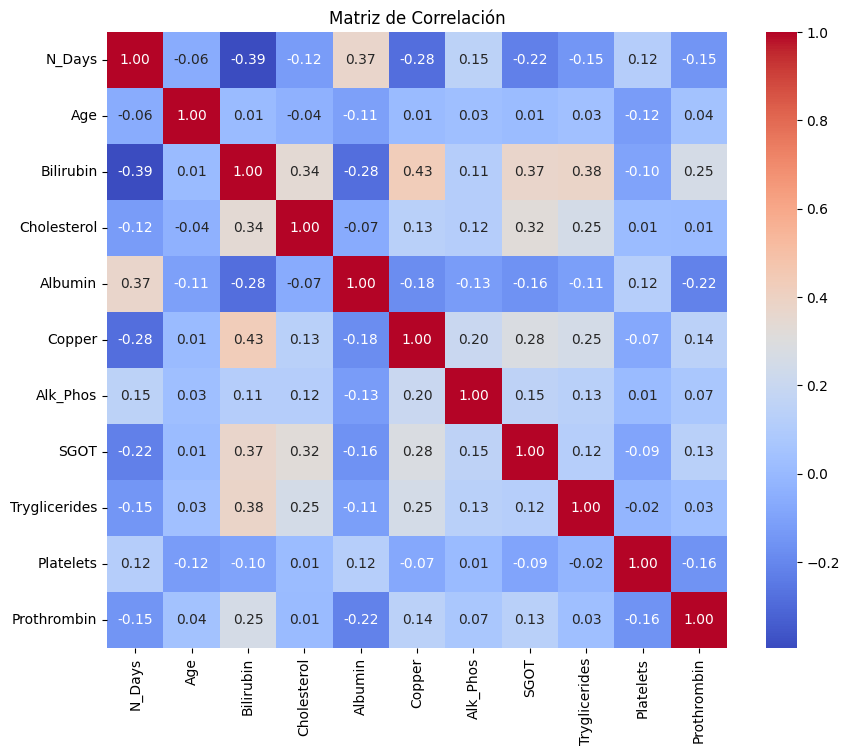

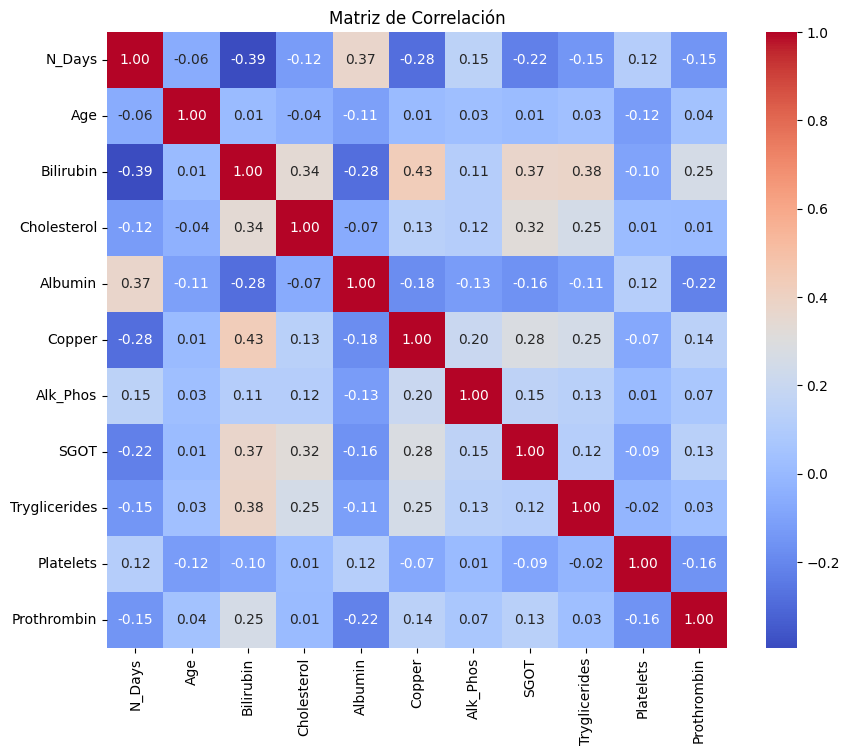

In [148]:
correlacion = df.corr(numeric_only=True)
#print(correlacion)
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

**Correlaciones más destacadas**

**Bilirubin y Copper:** 0.43, Correlación positiva moderada; niveles más altos de bilirrubina tienden a coincidir con más cobre.

**Bilirubin y SGOT:** 0.37, **Bilirubin y Triglycerides**: 0.38 → Relación positiva moderada.

**Albumin y N_Days:** 0.37, Mayor albúmina asociada con más días de seguimiento.

**SGOT y Cholesterol:** 0.32, **SGOT  y Copper:** 0.28, Ligera asociación de la enzima SGOT con colesterol y cobre.

**Bilirubin y Cholesterol:** 0.34, Relacione positiva moderada. <br>
<br>

**Correlaciones negativas relevantes**

**Bilirubin y N_Days:** -0.39, Mayor bilirrubina, menor supervivencia/seguimiento.

**Copper ↔ N_Days:** -0.28, Tendencia a menor tiempo de seguimiento con cobre alto.

**Albumin ↔ Bilirubin:** -0.28, Más bilirrubina asociada con menos albúmina (consistente con disfunción hepática). <br>
<br>

**Análisis**

La bilirubina es es una variable que revela mayores correlaciones: correlaciona moderadamente con cobre, SGOT y colesterol, y negativamente con tiempo de seguimiento y albúmina.

No hay correlaciones fuertes (>0.7), pudiendo aportar las variables diferentes caracteristicas en modelos

# **2. Selección de características**

## **2.1. Selección de características categóricas**

**Separación de variables**

In [ ]:
X = df.drop('Stage', axis=1) # Predictoras
y = df['Stage'] #Objetivo

**Funciones para preparación de:**

*   Variables predictoras
*   Variables objetivo
*   Selección de características



In [ ]:
from sklearn.preprocessing import OneHotEncoder

# prepare input data
def prepare_inputs(X_train, X_test):
  oe = OneHotEncoder(handle_unknown='ignore')
  #oe = OrdinalEncoder()
  oe.fit(X_train)
  X_train_enc = oe.transform(X_train)
  X_test_enc = oe.transform(X_test)
  return X_train_enc, X_test_enc

  # prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  return y_train_enc, y_test_enc

  # feature selection
def select_features(X_train, y_train, X_test, score_func, k ):
  fs = SelectKBest(score_func=score_func, k=k)
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

**Selección de variables categóricas**

In [ ]:

df_cat=df.select_dtypes(include=['object','category'])
df_cat.info()
X = df_cat.drop('Stage', axis=1)
y = df_cat['Stage']
# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=1) #### Verificar estratificado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Status        25000 non-null  category
 1   Drug          25000 non-null  category
 2   Sex           25000 non-null  category
 3   Ascites       25000 non-null  category
 4   Hepatomegaly  25000 non-null  category
 5   Spiders       25000 non-null  category
 6   Edema         25000 non-null  category
 7   Stage         25000 non-null  category
dtypes: category(8)
memory usage: 196.4 KB


#### **2.1.1. Chi-Cuadrado**

Feature 0: 549.424894
Feature 1: 5.439424
Feature 2: 796.987652
Feature 3: 61.596529
Feature 4: 35.930823
Feature 5: 6.150285
Feature 6: 46.924043
Feature 7: 90.962757
Feature 8: 186.665920
Feature 9: 814.849117
Feature 10: 1252.825889
Feature 11: 225.867522
Feature 12: 272.194747
Feature 13: 232.600294
Feature 14: 534.204691
Feature 15: 580.450996


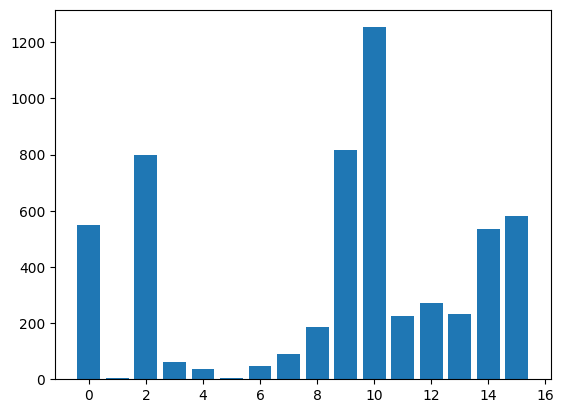

In [ ]:

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc, chi2, 'all')

# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


Variables seleccionadas que acumulan el 90% de la puntuación (total 9):
['Hepatomegaly_Y', 'Hepatomegaly_N', 'Status_D', 'Edema_Y', 'Status_C', 'Edema_S', 'Spiders_Y', 'Edema_N', 'Spiders_N']


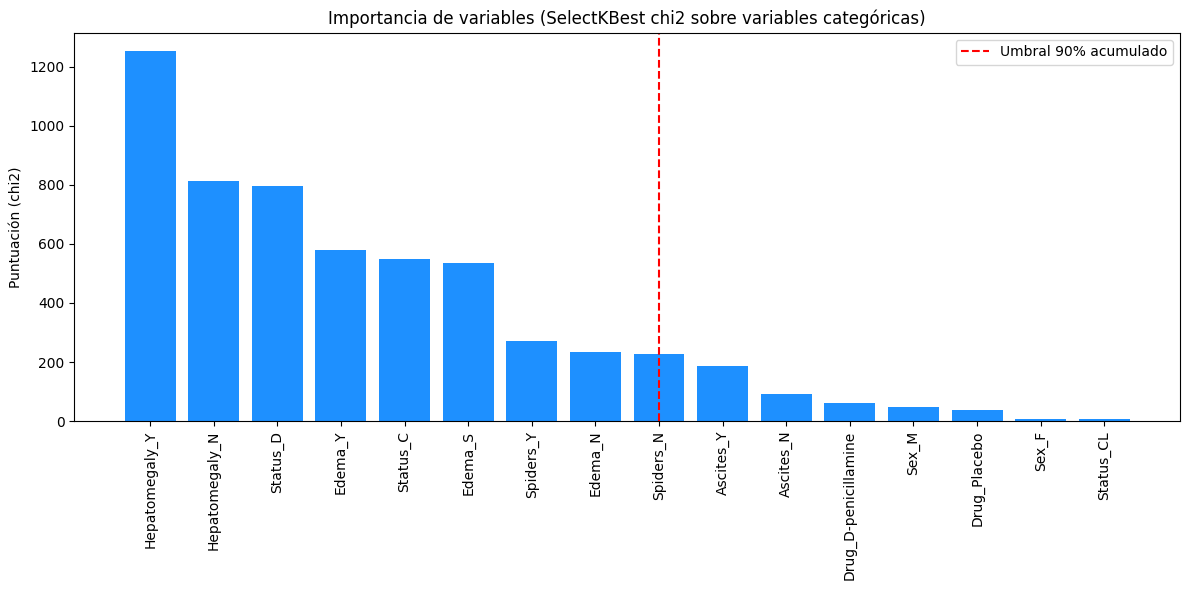

In [ ]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# Aplicar SelectKBest con chi2 sobre las variables
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_train_enc, y_train_enc)

scores = selector.scores_
# Get feature names after one-hot encoding
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train)
feature_names = ohe.get_feature_names_out(X.columns)


# Ordenar variables por puntuación descendente
indices = np.argsort(scores)[::-1]
sorted_scores = scores[indices]
sorted_features = feature_names[indices]

# Cálculo del porcentaje acumulado de la puntuación
cumulative_score = np.cumsum(sorted_scores) / np.sum(sorted_scores)

# Seleccionar variables que acumulan hasta 90% del total de puntuación
cutoff_index = np.searchsorted(cumulative_score, 0.90) + 1
selected_features = sorted_features[:cutoff_index]
print(f"Variables seleccionadas que acumulan el 90% de la puntuación (total {cutoff_index}):")
print(selected_features.tolist())

# Graficar puntuaciones y el umbral 90%
plt.figure(figsize=(12,6))
plt.bar(range(len(sorted_scores)), sorted_scores, color='dodgerblue')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.ylabel("Puntuación (chi2)")
plt.title("Importancia de variables (SelectKBest chi2 sobre variables categóricas)")
plt.axvline(cutoff_index-1, color='red', linestyle='--', label='Umbral 90% acumulado')
plt.legend()
plt.tight_layout()
plt.show()

### **Validación de modelos**

#### **Regresión Logística -  Soft Max**

In [ ]:
# 1) Asegurar la misma codificación que usaste para obtener feature_names
X_train_ohe = ohe.transform(X_train)   # matriz (sparse o densa) alineada con feature_names
X_test_ohe  = ohe.transform(X_test)

# 2) Construir la máscara de columnas según 'selected_features'
#    (selecciona solo las columnas OHE elegidas por el 90% acumulado de chi²)
feature_names = np.array(feature_names)  # por si no lo es
selected_mask = np.isin(feature_names, selected_features)

X_train_fs = X_train_ohe[:, selected_mask]
X_test_fs  = X_test_ohe[:, selected_mask]

print(f"Columnas finales seleccionadas: {selected_mask.sum()} / {len(feature_names)}")


Columnas finales seleccionadas: 9 / 16


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logit = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,        # subir iteraciones por si tarda en converger
    n_jobs=-1
)
logit.fit(X_train_fs, y_train_enc)

# 4) Evaluación
y_pred = logit.predict(X_test_fs)
acc = accuracy_score(y_test_enc, y_pred)
print(f"Accuracy: {acc*100:.2f}%\n")

print("Classification report (macro):")
print(classification_report(y_test_enc, y_pred, digits=3))

print("Matriz de confusión:")
print(confusion_matrix(y_test_enc, y_pred))

Accuracy: 49.99%

Classification report (macro):
              precision    recall  f1-score   support

           0      0.497     0.746     0.596      2727
           1      0.345     0.164     0.222      2786
           2      0.577     0.597     0.587      2737

    accuracy                          0.500      8250
   macro avg      0.473     0.502     0.468      8250
weighted avg      0.472     0.500     0.467      8250

Matriz de confusión:
[[2034  328  365]
 [1496  456  834]
 [ 564  539 1634]]


In [ ]:
def entrenar_y_evaluar(nombre, modelo, Xtr, ytr, Xte, yte):
    modelo.fit(Xtr, ytr)
    yhat = modelo.predict(Xte)
    acc = accuracy_score(yte, yhat)
    f1m = f1_score(yte, yhat)
    print(f"\n=== {nombre} ===")
    print(f"Accuracy: {acc*100:.2f}%  |  F1-macro: {f1m:.3f}")
    print("Matriz de confusión:")
    print(pd.crosstab(yte, yhat, rownames=["true"], colnames=["pred"]))
    print("\nReporte de clasificación:")
    print(classification_report(yte, yhat, digits=3))
    return modelo, yhat

#### **SVM**


In [ ]:
# Modelo
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_fs, y_train)

# Predicción
y_pred_svm = svm.predict(X_test_fs)

# Métricas
acc = accuracy_score(y_test, y_pred_svm)
f1m = f1_score(y_test, y_pred_svm, average='macro')
print(f"[SVM RBF] Accuracy: {acc*100:.2f}% | F1-macro: {f1m:.3f}")
print(pd.crosstab(y_test, y_pred_svm, rownames=['true'], colnames=['pred']))
print(classification_report(y_test, y_pred_svm, digits=3))

[SVM RBF] Accuracy: 51.67% | F1-macro: 0.492
pred     1    2     3
true                 
1     1786  397   544
2     1229  602   955
3      480  382  1875
              precision    recall  f1-score   support

           1      0.511     0.655     0.574      2727
           2      0.436     0.216     0.289      2786
           3      0.556     0.685     0.614      2737

    accuracy                          0.517      8250
   macro avg      0.501     0.519     0.492      8250
weighted avg      0.500     0.517     0.491      8250



#### **Árboles de Decisión**

In [ ]:
# Modelo (ajusta max_depth/min_samples_leaf si ves sobreajuste)
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,          # p.ej. 10, 20 si hay overfitting
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
tree.fit(X_train_fs, y_train)

# Predicción
y_pred_tree = tree.predict(X_test_fs)

# Métricas
acc = accuracy_score(y_test, y_pred_tree)
f1m = f1_score(y_test, y_pred_tree, average='macro')
print(f"[Decision Tree] Accuracy: {acc*100:.2f}% | F1-macro: {f1m:.3f}")
print(pd.crosstab(y_test, y_pred_tree, rownames=['true'], colnames=['pred']))
print(classification_report(y_test, y_pred_tree, digits=3))

[Decision Tree] Accuracy: 51.62% | F1-macro: 0.498
pred     1    2     3
true                 
1     1862  429   436
2     1229  693   864
3      565  468  1704
              precision    recall  f1-score   support

           1      0.509     0.683     0.583      2727
           2      0.436     0.249     0.317      2786
           3      0.567     0.623     0.594      2737

    accuracy                          0.516      8250
   macro avg      0.504     0.518     0.498      8250
weighted avg      0.504     0.516     0.497      8250



#### **Random Forest**

In [ ]:
# Modelo (n_estimators alto mejora estabilidad; limita max_depth si hay overfitting)
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,          # p.ej. 10, 20 si hay overfitting
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train_fs, y_train)

# Predicción
y_pred_rf = rf.predict(X_test_fs)

# Métricas
acc = accuracy_score(y_test, y_pred_rf)
f1m = f1_score(y_test, y_pred_rf, average='macro')
print(f"[Random Forest] Accuracy: {acc*100:.2f}% | F1-macro: {f1m:.3f}")
print(pd.crosstab(y_test, y_pred_rf, rownames=['true'], colnames=['pred']))
print(classification_report(y_test, y_pred_rf, digits=3))

[Random Forest] Accuracy: 51.62% | F1-macro: 0.498
pred     1    2     3
true                 
1     1862  429   436
2     1229  693   864
3      565  468  1704
              precision    recall  f1-score   support

           1      0.509     0.683     0.583      2727
           2      0.436     0.249     0.317      2786
           3      0.567     0.623     0.594      2737

    accuracy                          0.516      8250
   macro avg      0.504     0.518     0.498      8250
weighted avg      0.504     0.516     0.497      8250



### **2.1.2. Información mutua**

Feature 0: 0.035994
Feature 1: 0.000178
Feature 2: 0.039013
Feature 3: 0.002924
Feature 4: 0.002924
Feature 5: 0.001638
Feature 6: 0.001638
Feature 7: 0.008150
Feature 8: 0.008150
Feature 9: 0.064033
Feature 10: 0.064033
Feature 11: 0.014918
Feature 12: 0.014918
Feature 13: 0.035046
Feature 14: 0.017672
Feature 15: 0.016994


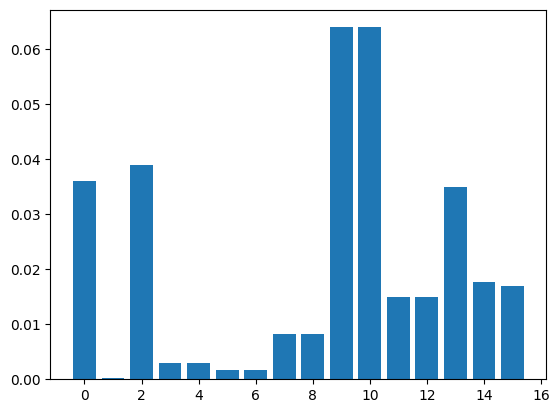

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc, mutual_info_classif, 'all')

# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Variables seleccionadas que acumulan el 90% de la puntuación (total 9):
['Hepatomegaly_N', 'Hepatomegaly_Y', 'Status_D', 'Status_C', 'Edema_N', 'Edema_S', 'Edema_Y', 'Spiders_Y', 'Spiders_N']


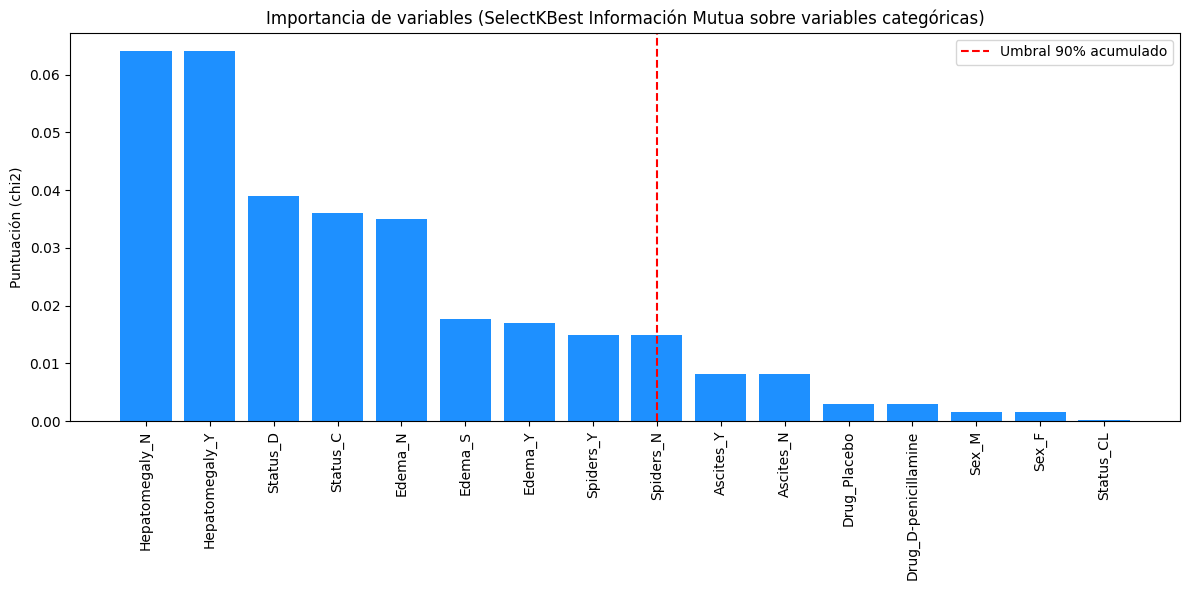

In [ ]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# Aplicar SelectKBest con información mutua sobre las variables
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(X_train_enc, y_train_enc)

scores = selector.scores_
# Get feature names after one-hot encoding
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train)
feature_names = ohe.get_feature_names_out(X.columns)


# Ordenar variables por puntuación descendente
indices = np.argsort(scores)[::-1]
sorted_scores = scores[indices]
sorted_features = feature_names[indices]

# Cálculo del porcentaje acumulado de la puntuación
cumulative_score = np.cumsum(sorted_scores) / np.sum(sorted_scores)

# Seleccionar variables que acumulan hasta 90% del total de puntuación
cutoff_index = np.searchsorted(cumulative_score, 0.90) + 1
selected_features = sorted_features[:cutoff_index]

print(f"Variables seleccionadas que acumulan el 90% de la puntuación (total {cutoff_index}):")
print(selected_features.tolist())

# Graficar puntuaciones y el umbral 90%
plt.figure(figsize=(12,6))
plt.bar(range(len(sorted_scores)), sorted_scores, color='dodgerblue')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.ylabel("Puntuación (chi2)")
plt.title("Importancia de variables (SelectKBest Información Mutua sobre variables categóricas)")
plt.axvline(cutoff_index-1, color='red', linestyle='--', label='Umbral 90% acumulado')
plt.legend()
plt.tight_layout()
plt.show()

### **2.1.3 Conclusión Parcial Chi2 y Información mutua:**

Tras aplicar las tecnicas de chi2 e información mutua, ambos métodos convergieron en el mismo conjunto de 9 variables categóricas, con evidencia de aporte predictivo y coherencia.
Dado que son variables nominales, la codificación One-Hot-Encoder (OHE) es la alternativa recomendada pasando de 7 variables iniciales a 16 codificadas.

Al coincidir los dos criterios de selección, los modelos se ejecutaron una sola vez sobre este conjunto.
En los experimentos con solo variables categóricas, Random Forest y árboles de decisión lograron la mejor accuracy (≈ 51,62 %). Este resultado se interpreta como una cota inferior del desempeño, pues se espera una mejora al integrar las variables numéricas en la sección 2.3.

## **2.2. Selección de características Numericas**

In [ ]:
df_num=df.select_dtypes(include=['int64','float64'])
df_num.info()
X = df_num
y = df_cat['Stage']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=1) #### Verificar estratificado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Age            25000 non-null  int64  
 2   Bilirubin      25000 non-null  float64
 3   Cholesterol    25000 non-null  float64
 4   Albumin        25000 non-null  float64
 5   Copper         25000 non-null  float64
 6   Alk_Phos       25000 non-null  float64
 7   SGOT           25000 non-null  float64
 8   Tryglicerides  25000 non-null  float64
 9   Platelets      25000 non-null  float64
 10  Prothrombin    25000 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 2.1 MB


In [ ]:
X_train

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
4054,3561,14610,1.4,369.510563,3.54,97.648387,1982.655769,122.556346,124.702128,117.00000,10.9
8395,2071,27394,0.7,369.510563,3.96,97.648387,1982.655769,122.556346,124.702128,257.02457,11.2
17719,2870,14812,0.9,460.000000,3.03,57.000000,721.000000,85.250000,174.000000,181.00000,9.8
7600,611,20248,2.0,420.000000,3.26,62.000000,3196.000000,77.500000,91.000000,256.00000,10.7
5185,1170,23011,2.2,369.510563,3.49,97.648387,1982.655769,122.556346,124.702128,371.00000,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3437,2286,14684,1.8,369.510563,3.64,97.648387,1982.655769,122.556346,124.702128,430.00000,10.0
22580,1343,18263,1.6,369.510563,3.48,97.648387,1982.655769,122.556346,124.702128,277.00000,10.2
3815,3157,12053,8.9,369.510563,3.76,97.648387,1982.655769,122.556346,124.702128,253.00000,9.9
22573,2272,22514,0.5,223.000000,3.80,15.000000,1044.000000,80.600000,89.000000,514.00000,10.0


**ANOVA F-Test**

Feature 0: 901.642958
Feature 1: 324.695606
Feature 2: 254.561731
Feature 3: 108.127753
Feature 4: 726.739904
Feature 5: 147.133123
Feature 6: 68.525415
Feature 7: 290.427581
Feature 8: 69.245407
Feature 9: 544.481942
Feature 10: 1097.093816
N_Days: 901.6429578356432
Age: 324.6956063733193
Bilirubin: 254.56173139584158
Cholesterol: 108.12775289495043
Albumin: 726.7399040951688
Copper: 147.13312328500714
Alk_Phos: 68.52541521164123
SGOT: 290.4275808417282
Tryglicerides: 69.2454069398742
Platelets: 544.4819415325966
Prothrombin: 1097.0938159011064


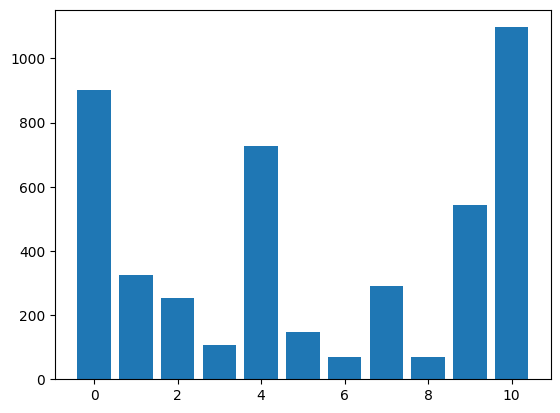

In [ ]:
from sklearn.feature_selection import f_classif

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, f_classif, 'all')

# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

# Asocia el nombre de la cariable con su puntaje
for col, score in zip(X_train.columns, fs.scores_):
    print(f"{col}: {score}")

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
# Crear lista de tuplas (variable, score) y ordenarla
scores_sorted = sorted(
    zip(X_train.columns, fs.scores_),
    key=lambda x: x[1],
    reverse=True
)

# Imprimir en orden
Score_ANOVA = []
for col, score in scores_sorted:
    Score_ANOVA.append(f"{col}: {round(score, 2)}")

Score_ANOVA

['Prothrombin: 1097.09',
 'N_Days: 901.64',
 'Albumin: 726.74',
 'Platelets: 544.48',
 'Age: 324.7',
 'SGOT: 290.43',
 'Bilirubin: 254.56',
 'Copper: 147.13',
 'Cholesterol: 108.13',
 'Tryglicerides: 69.25',
 'Alk_Phos: 68.53']

**Información Mutua**

Feature 0: 0.738702
Feature 1: 0.581081
Feature 2: 0.222805
Feature 3: 0.308636
Feature 4: 0.402712
Feature 5: 0.275770
Feature 6: 0.407029
Feature 7: 0.308592
Feature 8: 0.232222
Feature 9: 0.524484
Feature 10: 0.198458


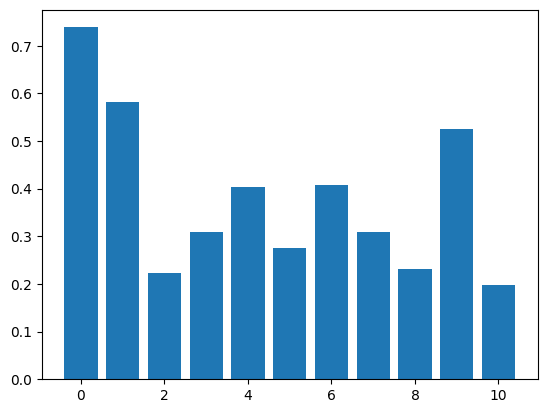

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, 'all')

# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

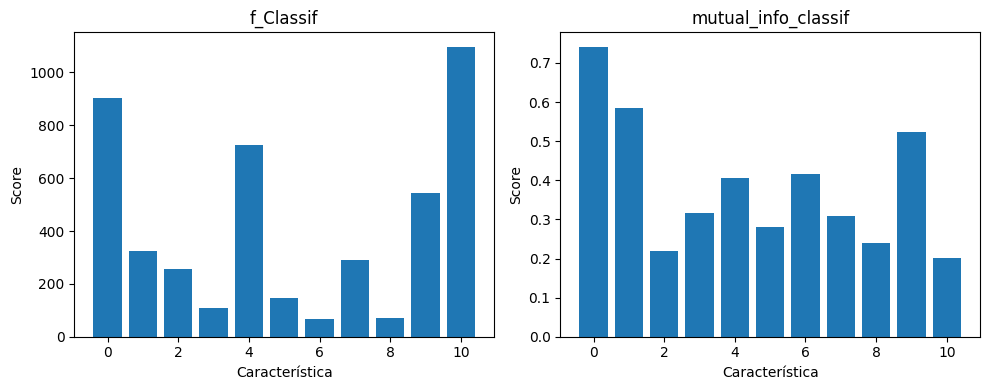

In [ ]:
from matplotlib import pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

# Crear figura con 2 columnas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, f_classif, 'all')

# Primera gráfica
axes[0].bar(range(len(fs.scores_)), fs.scores_)
axes[0].set_title("f_Classif")
axes[0].set_xlabel("Característica")
axes[0].set_ylabel("Score")



# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, 'all')

# Segunda gráfica
axes[1].bar(range(len(fs.scores_)), fs.scores_)
axes[1].set_title("mutual_info_classif")
axes[1].set_xlabel("Característica")
axes[1].set_ylabel("Score")

# Ajustar para que no se solapen los textos
plt.tight_layout()
plt.show()

Los dos selectores de caracetísticas f_classif y mutual info classif presentan diferentes scores y selección de características diferentes, aunque conicniden con las características 0, 4 y 9.
Se observa que con mutual info classif la mayoria de las variables presentan un score mas representativo, siendo las características 0, 1 y 9 las de mayor representativad, mientras que para f_classif las características mas representativas son 0, 4 y 10. <br>

**lo anterior no permite tener un buen parámetro para definir con cuales características trabajar**.

*Por lo tanto se decide modelar y observar el comportamiento de las variables (características a seleccionar)*

### **Modelados**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Ajustar solo en X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transformar X_test con el mismo escalador
X_test_scaled = scaler.transform(X_test)

### **Regresión logistica softmax - Todas las varaibles**

In [ ]:
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(multi_class='multinomial',solver='lbfgs')
model.fit(X_train_scaled, y_train)

# evaluate the model
yhat = model.predict(X_test_scaled)

# evaluate predictions
accuracy_lr = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy_lr*100))

Accuracy: 55.79


 ### **Regresión logistica softmax - 7 varaibles f_class**

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_scaled, y_train, X_test_scaled, f_classif, 7)

# fit the model
model = LogisticRegression(multi_class='multinomial',solver='lbfgs')
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy_lr_ANOVA = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy_lr_ANOVA*100))

Accuracy: 55.95


Feature 0: 901.642958
Feature 1: 324.695606
Feature 2: 254.561731
Feature 3: 108.127753
Feature 4: 726.739904
Feature 5: 147.133123
Feature 6: 68.525415
Feature 7: 290.427581
Feature 8: 69.245407
Feature 9: 544.481942
Feature 10: 1097.093816


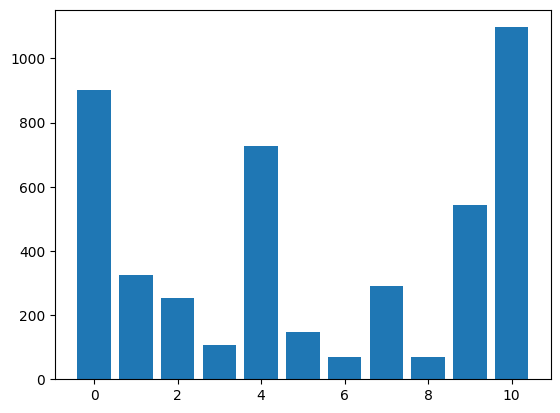

In [ ]:
from sklearn.feature_selection import f_classif

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, f_classif, 'all')

# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Con k= 7, 8 y 10. Se obtiene un mejor accuracy, sin embargo, se evalua el modelo:

#### **Ajustando el número de caracteristicas seleccionadas con ANOVA (f_classif)**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the pipeline to evaluate
model = LogisticRegression(multi_class='multinomial',solver='lbfgs')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])

# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)

# perform the search
results = search.fit(X_train_scaled, y_train)

# summarize best
print('Best Mean Accuracy: %.4f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.5555
Best Config: {'anova__k': 11}


**Evaluación del modelo**

In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# evaluate a given model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

>1 0.475 (0.008)
>2 0.511 (0.014)
>3 0.521 (0.012)
>4 0.529 (0.012)
>5 0.544 (0.010)
>6 0.549 (0.010)
>7 0.552 (0.011)
>8 0.551 (0.010)
>9 0.550 (0.009)
>10 0.553 (0.008)
>11 0.556 (0.009)


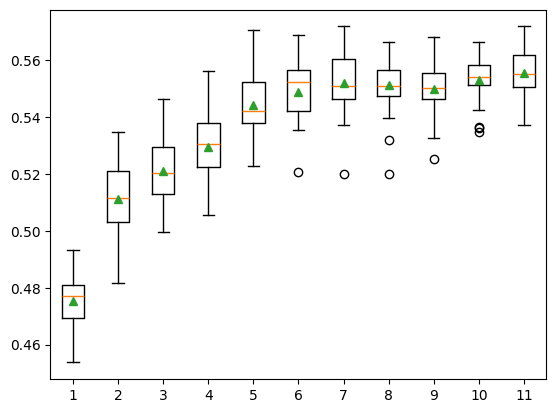

In [ ]:
# define number of features to evaluate
num_features = [i+1 for i in range(X.shape[1])]

# enumerate each number of features
results = list()

for k in num_features:
  # create pipeline
  model = LogisticRegression(multi_class='multinomial',solver='lbfgs')
  fs = SelectKBest(score_func=f_classif, k=k)
  pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
  # evaluate the model
  scores = evaluate_model(pipeline)
  results.append(scores)
  # summarize the results
  print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, tick_labels=num_features, showmeans=True)
pyplot.show()

### **Modelo - Información mutua**

**4 Variables - Soft Max**

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_scaled, y_train, X_test_scaled, mutual_info_classif, 4)

# fit the model
model = LogisticRegression(multi_class='multinomial',solver='lbfgs')
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy_lr_mic = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy_lr_mic*100))

Accuracy: 50.16


**Ajustando el número de caracteristicas seleccionadas con mutual info classif**

In [ ]:
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the pipeline to evaluate
model = LogisticRegression(multi_class='multinomial',solver='lbfgs')
fs = SelectKBest(score_func=mutual_info_classif)
pipeline = Pipeline(steps=[('mic',fs), ('lr', model)])

# define the grid
grid = dict()
grid['mic__k'] = [i+1 for i in range(X.shape[1])]

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)

# perform the search
results = search.fit(X_train_scaled, y_train)

# summarize best
print('Best Mean Accuracy: %.4f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.5555
Best Config: {'mic__k': 11}


**Evaluación del modelo**

>1 0.468 (0.012)
>2 0.483 (0.012)
>3 0.472 (0.011)
>4 0.492 (0.012)
>5 0.505 (0.013)
>6 0.515 (0.011)
>7 0.519 (0.010)
>8 0.521 (0.010)
>9 0.522 (0.011)
>10 0.521 (0.010)
>11 0.556 (0.009)


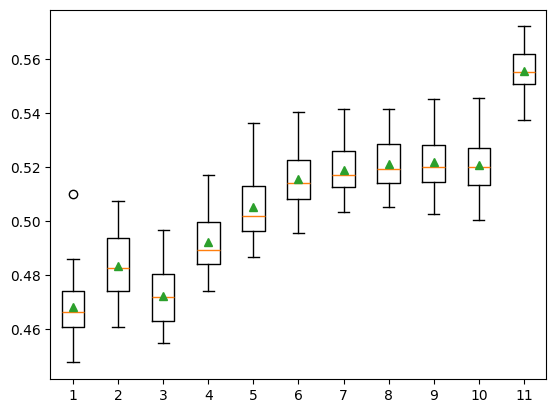

In [ ]:
# define number of features to evaluate
num_features = [i+1 for i in range(X.shape[1])]

# enumerate each number of features
results = list()

for k in num_features:
  # create pipeline
  model = LogisticRegression(multi_class='multinomial',solver='lbfgs')
  fs = SelectKBest(score_func=mutual_info_classif, k=k)
  pipeline = Pipeline(steps=[('mic',fs), ('lr', model)])
  # evaluate the model
  scores = evaluate_model(pipeline)
  results.append(scores)
  # summarize the results
  print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, tick_labels=num_features, showmeans=True)
pyplot.show()

Con mutual info classif definitivamente solo con 11 características obtiene el mejor promedio de accuracy

### **Modelo SVC**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Crear el modelo
model = SVC(
    kernel='rbf',   # Tipos: 'linear', 'poly', 'rbf', 'sigmoid'
    C=1.0,          # Controla la penalización de errores (regularización)
    gamma='scale',  # Escala del kernel RBF
    random_state=42
)

# Entrenar
model.fit(X_train_scaled, y_train)  # Recomendado: usar datos escalados

# Predecir
yhat = model.predict(X_test_scaled)

# Evaluar
accuracy_SVC = accuracy_score(y_test, yhat)
print(f"Accuracy: {accuracy_SVC*100:.2f}%")

Accuracy: 75.58%


#### **Model SVC usando ANOVA (f_classif)**

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_scaled, y_train, X_test_scaled, f_classif, 6)

# Crear el modelo
model = SVC(
    kernel='rbf',   # Tipos: 'linear', 'poly', 'rbf', 'sigmoid'
    C=1.0,          # Controla la penalización de errores (regularización)
    gamma='scale',  # Escala del kernel RBF
    random_state=42
)

# Entrenar
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy_SVC_ANOVA = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy_SVC_ANOVA*100))

Accuracy: 70.99


¿Cuales columnas selecciono el modelo?

In [ ]:
print(fs.get_support(indices=True)) # que columnas selecciono

[ 0  1  4  7  9 10]


In [ ]:
print(fs.scores_) #  scores
print(fs.pvalues_) # p-valores

[ 901.64295784  324.69560637  254.5617314   108.12775289  726.7399041
  147.13312329   68.52541521  290.42758084   69.24540694  544.48194153
 1097.0938159 ]
[0.00000000e+000 4.48555953e-139 1.23715709e-109 2.19443745e-047
 2.15279434e-303 4.52689264e-064 2.29563529e-030 1.01620224e-124
 1.12399875e-030 8.02955357e-230 0.00000000e+000]


#### **Ajustando el número de caracteristicas seleccionadas con ANOVA(f_classif)**
Evaluación con gridsearch (58 min)

In [ ]:
###Ejecución de 1 hora####
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the pipeline to evaluate
model = SVC(
    kernel='rbf',   # Tipos: 'linear', 'poly', 'rbf', 'sigmoid'
    C=1.0,          # Controla la penalización de errores (regularización)
    gamma='scale',  # Escala del kernel RBF
    random_state=42
)
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('svc', model)])

# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)

# perform the search
results = search.fit(X_train_scaled, y_train)

# summarize best
print('Best Mean Accuracy: %.4f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.7573
Best Config: {'anova__k': 11}


Evaluación utilizando enable_halving_search_cv (9 min)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv  # Necesario para activar HalvingGridSearchCV
from sklearn.model_selection import HalvingGridSearchCV

# Definir la validación cruzada
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

# Definir el modelo
model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

# Selección de características
fs = SelectKBest(score_func=f_classif)

# Pipeline
pipeline = Pipeline(steps=[('anova', fs), ('svc', model)])

# Grid de búsqueda
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]  # Prueba todas las variables posibles

# Halving Grid Search
search = HalvingGridSearchCV(
    pipeline,
    grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=cv,
    factor=2,          # Cuánto reducir las combinaciones en cada iteración
    min_resources='exhaust',
    verbose=1
)

# Ejecutar búsqueda
results = search.fit(X_train_scaled, y_train)

# Resultados
print("Mejor exactitud media: %.4f" % results.best_score_)
print("Mejor número de características (k):", results.best_params_['anova__k'])

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 2093
max_resources_: 16750
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 11
n_resources: 2093
Fitting 10 folds for each of 11 candidates, totalling 110 fits
----------
iter: 1
n_candidates: 6
n_resources: 4186
Fitting 10 folds for each of 6 candidates, totalling 60 fits
----------
iter: 2
n_candidates: 3
n_resources: 8372
Fitting 10 folds for each of 3 candidates, totalling 30 fits
----------
iter: 3
n_candidates: 2
n_resources: 16744
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Mejor exactitud media: 0.7524
Mejor número de características (k): 11


**Se seleccionan 11 características**

**Evaluación del modelo (1 hora)**

>1 0.498 (0.010)
>2 0.549 (0.012)
>3 0.596 (0.012)
>4 0.645 (0.011)
>5 0.690 (0.014)
>6 0.704 (0.012)
>7 0.719 (0.013)
>8 0.734 (0.010)
>9 0.747 (0.010)
>10 0.754 (0.011)
>11 0.757 (0.010)


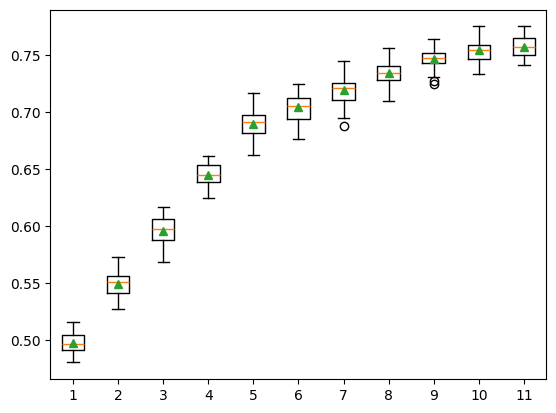

In [ ]:
# define number of features to evaluate
num_features = [i+1 for i in range(X.shape[1])]

# enumerate each number of features
results = list()

for k in num_features:
  # create pipeline
  model = SVC(
    kernel='rbf',   # Tipos: 'linear', 'poly', 'rbf', 'sigmoid'
    C=1.0,          # Controla la penalización de errores (regularización)
    gamma='scale',  # Escala del kernel RBF
    random_state=42
)
  fs = SelectKBest(score_func=f_classif, k=k)
  pipeline = Pipeline(steps=[('anova',fs), ('model', model)])
  # evaluate the model
  scores = evaluate_model(pipeline)
  results.append(scores)
  # summarize the results
  print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, tick_labels=num_features, showmeans=True)
pyplot.show()

#### **Modelo SVC Usando Mutual Information Features**

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_scaled, y_train, X_test_scaled, mutual_info_classif, 6)

# Crear el modelo
model = SVC(
    kernel='rbf',   # Tipos: 'linear', 'poly', 'rbf', 'sigmoid'
    C=1.0,          # Controla la penalización de errores (regularización)
    gamma='scale',  # Escala del kernel RBF
    random_state=42
)

# Entrenar
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy_SVC_mic = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy_SVC_mic*100))

Accuracy: 66.75


In [ ]:
print(fs.get_support(indices=True))

[0 1 4 6 7 9]


In [ ]:
print(fs.scores_)

[0.74306325 0.58164661 0.22284323 0.31273756 0.40342511 0.28189134
 0.41145746 0.31515884 0.23540281 0.52156607 0.19808603]


#### **Ajustando el número de caracteristicas seleccionadas con mutual info classif**

In [ ]:
# Definir la validación cruzada
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

# Definir el modelo
model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

# Selección de características
fs = SelectKBest(score_func = mutual_info_classif)

# Pipeline
pipeline = Pipeline(steps=[('mic', fs), ('svc', model)])

# Grid de búsqueda
grid = dict()
grid['mic__k'] = [i+1 for i in range(X.shape[1])]  # Prueba todas las variables posibles

# Halving Grid Search
search = HalvingGridSearchCV(
    pipeline,
    grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=cv,
    factor=2,          # Cuánto reducir las combinaciones en cada iteración
    min_resources='exhaust',
    verbose=1
)

# Ejecutar búsqueda
results = search.fit(X_train_scaled, y_train)

# Resultados
print("Mejor exactitud media: %.4f" % results.best_score_)
print("Mejor número de características (k):", results.best_params_['mic__k'])

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 2093
max_resources_: 16750
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 11
n_resources: 2093
Fitting 10 folds for each of 11 candidates, totalling 110 fits
----------
iter: 1
n_candidates: 6
n_resources: 4186
Fitting 10 folds for each of 6 candidates, totalling 60 fits
----------
iter: 2
n_candidates: 3
n_resources: 8372
Fitting 10 folds for each of 3 candidates, totalling 30 fits
----------
iter: 3
n_candidates: 2
n_resources: 16744
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Mejor exactitud media: 0.7525
Mejor número de características (k): 11


In [ ]:
# evaluate a given model using cross-validation
def evaluate_model_SVR(model):
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
  scores = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

#### **Evaluación del modelo**

>1 0.483 (0.004)
>2 0.505 (0.009)
>3 0.566 (0.009)
>4 0.597 (0.010)
>5 0.635 (0.012)
>6 0.661 (0.016)
>7 0.683 (0.010)
>8 0.694 (0.010)
>9 0.712 (0.007)
>10 0.721 (0.010)
>11 0.752 (0.007)


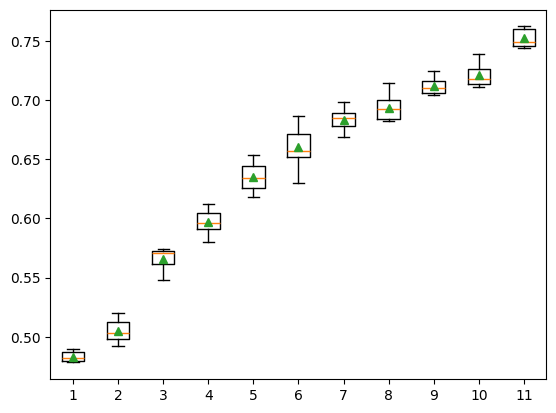

In [ ]:
# define number of features to evaluate
num_features = [i+1 for i in range(X.shape[1])]

# enumerate each number of features
results = list()

for k in num_features:
  # create pipeline
  model = SVC(
    kernel='rbf',   # Tipos: 'linear', 'poly', 'rbf', 'sigmoid'
    C=1.0,          # Controla la penalización de errores (regularización)
    gamma='scale',  # Escala del kernel RBF
    random_state=42
)
  fs = SelectKBest(score_func = mutual_info_classif, k=k)
  pipeline = Pipeline(steps=[('mic',fs), ('model', model)])
  # evaluate the model
  scores = evaluate_model_SVR(pipeline)
  results.append(scores)
  # summarize the results
  print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, tick_labels=num_features, showmeans=True)
pyplot.show()

In [ ]:
print(accuracy_lr)
print(accuracy_lr_ANOVA)
print(accuracy_lr_mic)
print(accuracy_SVC)
print(accuracy_SVC_ANOVA)
print(accuracy_SVC_mic)

0.557939393939394
0.5595151515151515
0.5015757575757576
0.7557575757575757
0.709939393939394
0.6675151515151515


In [ ]:
df_scores = pd.DataFrame({
    'Modelo': [
        'Logistic Regression',
        'Logistic Regression + ANOVA',
        'Logistic Regression + MIC',
        'SVC',
        'SVC + ANOVA',
        'SVC + MIC'
    ],
    'Accuracy': [
        accuracy_lr,
        accuracy_lr_ANOVA,
        accuracy_lr_mic,
        accuracy_SVC,
        accuracy_SVC_ANOVA,
        accuracy_SVC_mic
    ]
})

# Ordenar de mayor a menor por Accuracy
df_scores = df_scores.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print(df_scores)

                        Modelo  Accuracy
0                          SVC  0.755758
1                  SVC + ANOVA  0.709939
2                    SVC + MIC  0.667515
3  Logistic Regression + ANOVA  0.559515
4          Logistic Regression  0.557939
5    Logistic Regression + MIC  0.501576


### **Conclusiones parciales:**

Los diferentes modelos no mostraron un mejor accuracy respecto a su modelo principal con todas las variables (características) implementando tecnicas de selección de características.
<br>
- En la evaluación del modelo de la regresión logística softmax se observo que con 7 variables se podia obtener un accuracy similar al accuracy del modelo normal.

- Los anteriores modelos y algoritmos utilizados no permiten realizar una selección de características que permita reducir la cantidad de variables a utilizar.

- Dentro de los modelos uno de los que presento mejor accuracy (con solo variables numericas) fue SVC sin reducir variables (0.7557), sin embargo, se espera que este resultado mejore al unir los datos con las varaibles categóricas en la seccion 2.3.

## **2.3. Unión de variables categóricas y númericas**

Para esta sección se usan las 9 características categóricas obtenidadas en la sección 2.1 y como resultado de la sección 2.2, se obtuvo que lo recomendable es mantener todas todas las númericas, por lo que al final se obtuvo 20 variables predictoras.

In [164]:
#### Categóricas a mantener
ohe_keep = [
    "Hepatomegaly_N", "Hepatomegaly_Y",
    "Status_D", "Status_C",
    "Edema_N", "Edema_S", "Edema_Y",
    "Spiders_Y", "Spiders_N",
]

# Columnas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Evitar que la etiqueta esté en X
if "Stage" in num_cols: num_cols.remove("Stage")
if "Stage" in cat_cols: cat_cols.remove("Stage")

X = df[num_cols + cat_cols]
y = df["Stage"]


In [165]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn import set_config
from sklearn.compose import ColumnTransformer
# =============  TRANSFORMADORES =============
set_config(transform_output="pandas")  # para conservar nombres

def select_keep_cols(X_df):
    """Devuelve solo las columnas en ohe_keep, creando las que falten con ceros."""
    missing = [c for c in ohe_keep if c not in X_df.columns]
    for m in missing:
        X_df[m] = 0
    return X_df[ohe_keep]

# Numéricas: imputación mediana + estandarización
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categóricas: imputación moda + OHE + seleccionar columnas específicas
cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
    ("select", FunctionTransformer(select_keep_cols, feature_names_out=lambda _, input_features: np.array(ohe_keep)))
])

In [166]:
# Unión
preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ],
    remainder="drop"
)

# ============= SPLIT =============
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)

In [167]:
# Ajustar y transformar
X_train_t = preprocess.fit_transform(X_train)
X_test_t  = preprocess.transform(X_test)

# Mostrar info resumida
for name, X_ in [("Train", X_train_t), ("Test", X_test_t)]:
    print(f"\n{name}: {X_.shape[0]} filas × {X_.shape[1]} columnas")
    print("Columnas:", list(X_.columns))


Train: 16750 filas × 20 columnas
Columnas: ['num__N_Days', 'num__Age', 'num__Bilirubin', 'num__Cholesterol', 'num__Albumin', 'num__Copper', 'num__Alk_Phos', 'num__SGOT', 'num__Tryglicerides', 'num__Platelets', 'num__Prothrombin', 'cat__Hepatomegaly_N', 'cat__Hepatomegaly_Y', 'cat__Status_D', 'cat__Status_C', 'cat__Edema_N', 'cat__Edema_S', 'cat__Edema_Y', 'cat__Spiders_Y', 'cat__Spiders_N']

Test: 8250 filas × 20 columnas
Columnas: ['num__N_Days', 'num__Age', 'num__Bilirubin', 'num__Cholesterol', 'num__Albumin', 'num__Copper', 'num__Alk_Phos', 'num__SGOT', 'num__Tryglicerides', 'num__Platelets', 'num__Prothrombin', 'cat__Hepatomegaly_N', 'cat__Hepatomegaly_Y', 'cat__Status_D', 'cat__Status_C', 'cat__Edema_N', 'cat__Edema_S', 'cat__Edema_Y', 'cat__Spiders_Y', 'cat__Spiders_N']


## **2.4. Modelos y comparación**

#### **Soft Max**

In [ ]:
logit = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000
)

pipe = Pipeline(steps=[
    ("preprocess", preprocess),   # <- aplica ColumnTransformer
    ("clf", logit)
])

# Entrenar
pipe.fit(X_train, y_train)

# Predecir
y_pred = pipe.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}%\n")

print("Classification report:")
print(classification_report(y_test, y_pred, digits=3))

# Matriz de confusión con etiquetas ordenadas
classes_ = pipe.named_steps["clf"].classes_
cm = confusion_matrix(y_test, y_pred, labels=classes_)
cm_df = pd.DataFrame(cm,
                     index=[f"true_{c}" for c in classes_],
                     columns=[f"pred_{c}" for c in classes_])
print("\nMatriz de confusión:")
print(cm_df)


Accuracy: 58.52%

Classification report:
              precision    recall  f1-score   support

           1      0.582     0.605     0.593      2727
           2      0.510     0.467     0.488      2786
           3      0.656     0.685     0.670      2737

    accuracy                          0.585      8250
   macro avg      0.583     0.586     0.584      8250
weighted avg      0.582     0.585     0.583      8250


Matriz de confusión:
        pred_1  pred_2  pred_3
true_1    1651     695     381
true_2     883    1302     601
true_3     305     557    1875


#### **SVC**

In [ ]:
# Definir modelo SVM RBF
svm_clf = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

# Pipeline: preprocesamiento + SVM
pipe_svm = Pipeline(steps=[
    ("preprocess", preprocess),  # ColumnTransformer con numéricas + categóricas
    ("svm", svm_clf)
])

# Entrenar
pipe_svm.fit(X_train, y_train)

# Predecir
y_pred_svm = pipe_svm.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred_svm)
f1m = f1_score(y_test, y_pred_svm, average='macro')

print(f"[SVM RBF] Accuracy: {acc*100:.2f}% | F1-macro: {f1m:.3f}")

# Matriz de confusión
cm_df = pd.crosstab(y_test, y_pred_svm, rownames=['true'], colnames=['pred'])
print("\nMatriz de confusión:")
print(cm_df)

# Reporte detallado
print("\nClassification report:")
print(classification_report(y_test, y_pred_svm, digits=3))

[SVM RBF] Accuracy: 80.82% | F1-macro: 0.809

Matriz de confusión:
pred     1     2     3
true                  
1     2109   488   130
2      355  2248   183
3      160   266  2311

Classification report:
              precision    recall  f1-score   support

           1      0.804     0.773     0.788      2727
           2      0.749     0.807     0.777      2786
           3      0.881     0.844     0.862      2737

    accuracy                          0.808      8250
   macro avg      0.811     0.808     0.809      8250
weighted avg      0.811     0.808     0.809      8250



#### **Árboles de decisión**

In [ ]:

from sklearn.model_selection import GridSearchCV, StratifiedKFold

dt_clf = DecisionTreeClassifier(random_state=42)

pipe_dt = Pipeline(steps=[
    ("preprocess", preprocess),
    ("dt", dt_clf)
])

param_grid = {
    "dt__criterion": ["gini", "entropy", "log_loss"],
    "dt__max_depth": [None, 3, 5, 8, 12],
    "dt__min_samples_split": [2, 5, 10],
    "dt__min_samples_leaf": [1, 2, 4]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs = GridSearchCV(
    estimator=pipe_dt,
    param_grid=param_grid,
    scoring="f1_macro",          # o "accuracy", "balanced_accuracy"
    cv=cv,
    n_jobs=-1,
    refit=True,
    verbose=0
)

gs.fit(X_train, y_train)
print("Mejores hiperparámetros:", gs.best_params_)
print(f"Mejor F1-macro CV: {gs.best_score_:.3f}")

# Evaluación en test con el mejor modelo
best_dt = gs.best_estimator_
y_pred_dt = best_dt.predict(X_test)

acc = accuracy_score(y_test, y_pred_dt)
f1m = f1_score(y_test, y_pred_dt, average="macro")
print(f"[DecisionTree-GS] Accuracy: {acc*100:.2f}% | F1-macro: {f1m:.3f}")

print("\nMatriz de confusión:")
print(pd.crosstab(y_test, y_pred_dt, rownames=["true"], colnames=["pred"]))

print("\nClassification report:")
print(classification_report(y_test, y_pred_dt, digits=3))

Mejores hiperparámetros: {'dt__criterion': 'entropy', 'dt__max_depth': None, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}
Mejor F1-macro CV: 0.913
[DecisionTree-GS] Accuracy: 91.89% | F1-macro: 0.919

Matriz de confusión:
pred     1     2     3
true                  
1     2514   146    67
2      170  2532    84
3       71   131  2535

Classification report:
              precision    recall  f1-score   support

           1      0.913     0.922     0.917      2727
           2      0.901     0.909     0.905      2786
           3      0.944     0.926     0.935      2737

    accuracy                          0.919      8250
   macro avg      0.919     0.919     0.919      8250
weighted avg      0.919     0.919     0.919      8250



### **Random Forest** - Se deja planteado, sin embargo, por tiempo de ejecución no se alcanzó a analizar.

In [173]:
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score
# Pipeline: preprocesamiento + Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

pipe_rf = Pipeline(steps=[
    ("preprocess", preprocess),  # ColumnTransformer (num + cat)
    ("rf", rf)
])

# Búsqueda de hiperparámetros
param_grid = {
    "rf__n_estimators": [200],
    "rf__max_depth": [None, 5],
    "rf__min_samples_split": [2],
    "rf__min_samples_leaf": [1],
    "rf__max_features": ["sqrt"],   # 0.5 = 50% de features
    "rf__class_weight": ["balanced"]
}

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

gs = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid,
    scoring="f1_macro",      # puedes cambiar a "balanced_accuracy" o "accuracy"
    cv=cv,
    n_jobs=-1,
    refit=True,
    verbose=0
)

# Entrenar búsqueda
gs.fit(X_train, y_train)
print("Mejores hiperparámetros:", gs.best_params_)
print(f"Mejor F1-macro CV: {gs.best_score_:.3f}")

# Evaluación en test con el mejor modelo
best_rf = gs.best_estimator_
y_pred_rf = best_rf.predict(X_test)

acc  = accuracy_score(y_test, y_pred_rf)
f1m  = f1_score(y_test, y_pred_rf, average="macro")
bacc = balanced_accuracy_score(y_test, y_pred_rf)

print(f"[RandomForest-GS] Accuracy: {acc*100:.2f}% | F1-macro: {f1m:.3f} | Balanced Acc: {bacc:.3f}")

print("\nMatriz de confusión:")
print(pd.crosstab(y_test, y_pred_rf, rownames=["true"], colnames=["pred"]))

print("\nClassification report:")
print(classification_report(y_test, y_pred_rf, digits=3))

Mejores hiperparámetros: {'rf__class_weight': 'balanced', 'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Mejor F1-macro CV: 0.938
[RandomForest-GS] Accuracy: 94.96% | F1-macro: 0.950 | Balanced Acc: 0.950

Matriz de confusión:
pred     1     2     3
true                  
1     2564   128    35
2      107  2628    51
3       29    66  2642

Classification report:
              precision    recall  f1-score   support

           1      0.950     0.940     0.945      2727
           2      0.931     0.943     0.937      2786
           3      0.968     0.965     0.967      2737

    accuracy                          0.950      8250
   macro avg      0.950     0.950     0.950      8250
weighted avg      0.950     0.950     0.950      8250



### **2.3.1. Conclusión parcial:**

Una vez unido el conjunto de variables categóricas y numéricas, se obtuvo:


*   Soft Max, Accuracy = 58.52%
*   SVC, Accuracy = 80.82%
*   Árboles de decisión, Accuracy = 91.89%
*   Ramdom Forest, Accuracy =

Se evidencia que con el modelo de árboles de decisión se obtiene el mejor accuracy y se comprueba que regresión logistica Soft Max no tiene el buen rendimiento en los diferentes escenarios.

# **3. MCA Y PCA**

## **3.1. MCA**

In [ ]:
!pip install mca #librería para hacer análisis de correspondencia múltiple

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mca

In [ ]:
# split into train and test sets

df_cat=df.select_dtypes(include=['object','category'])
df_cat.info()
X = df_cat.drop('Stage', axis=1)
y = df_cat['Stage']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=1) #### Verificar estratificado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Status        25000 non-null  category
 1   Drug          25000 non-null  category
 2   Sex           25000 non-null  category
 3   Ascites       25000 non-null  category
 4   Hepatomegaly  25000 non-null  category
 5   Spiders       25000 non-null  category
 6   Edema         25000 non-null  category
 7   Stage         25000 non-null  category
dtypes: category(8)
memory usage: 196.4 KB


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16750 entries, 4054 to 2476
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Status        16750 non-null  category
 1   Drug          16750 non-null  category
 2   Sex           16750 non-null  category
 3   Ascites       16750 non-null  category
 4   Hepatomegaly  16750 non-null  category
 5   Spiders       16750 non-null  category
 6   Edema         16750 non-null  category
dtypes: category(7)
memory usage: 246.2 KB


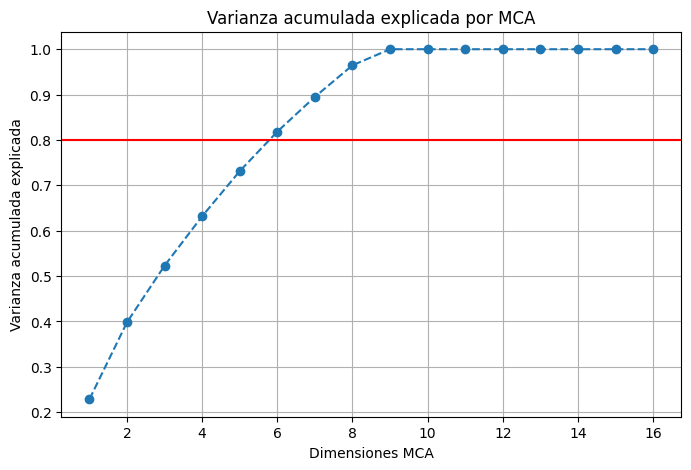

Se necesitan 6 dimensiones para explicar al menos el 80% de la varianza.


In [ ]:
# Codificación del conjunto de entrenamiento
X_train_encoded = pd.get_dummies(X_train)

# Codificación del conjunto de prueba
X_test_encoded = pd.get_dummies(X_test)

# Aplicar MCA
mca_cirrosis = mca.MCA(X_train_encoded, benzecri=True)

# Valores singulares y autovalores
sv = mca_cirrosis.s
eigvals = sv ** 2
explained_var = eigvals / eigvals.sum()
cum_explained_var = np.cumsum(explained_var)

# Graficar varianza acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_explained_var)+1), cum_explained_var, marker='o', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='-')
plt.xlabel('Dimensiones MCA')
plt.ylabel('Varianza acumulada explicada')
plt.title('Varianza acumulada explicada por MCA')
plt.grid(True)
plt.show()

n_dims_90 = np.argmax(cum_explained_var >= 0.8) + 1  # +1 porque los índices empiezan en 0
print(f'Se necesitan {n_dims_90} dimensiones para explicar al menos el 80% de la varianza.')

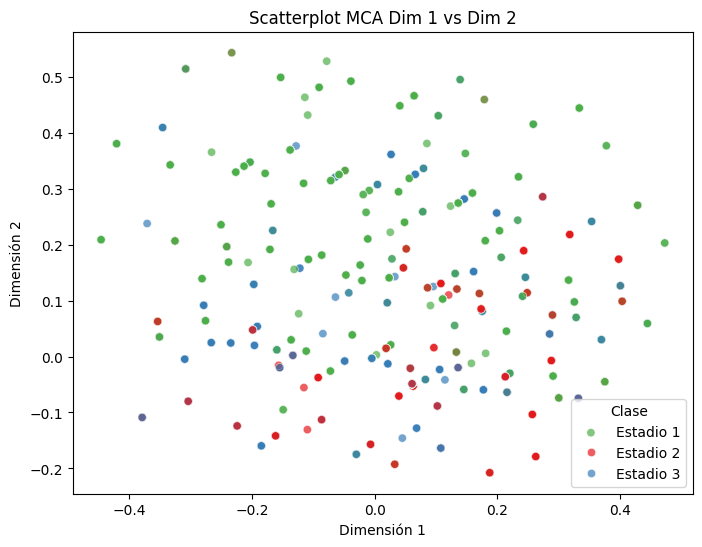

In [ ]:
# Coordenadas individuos (2 primeras dimensiones)
coords = mca_cirrosis.fs_r(N=3)

plt.figure(figsize=(8,6))
sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=y_train, palette='Set1', alpha=0.7)
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Scatterplot MCA Dim 1 vs Dim 2')
plt.legend(title='Clase', labels=['Estadio 1', 'Estadio 2','Estadio 3'])
plt.show()

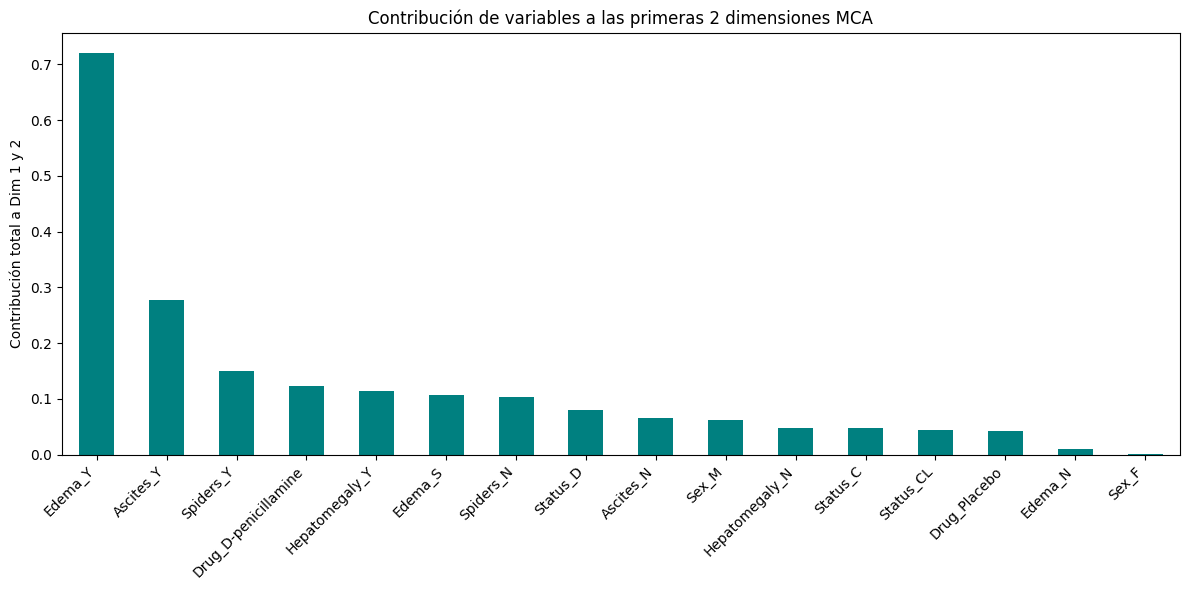

In [ ]:
#Para ver las cargas de cada variable en las primeras dos componentes

# Coordenadas variables categóricas (loadings) primeras 2 dimensiones
loadings_cat = pd.DataFrame(mca_cirrosis.fs_c()[:, :2], index=X_train_encoded.columns)

# Calcular contribución de cada variable (cuadrado / suma por dimensión)
loadings_sq = loadings_cat ** 2
contrib_cat = loadings_sq.div(loadings_sq.sum(axis=0), axis=1)

# Sumar contribuciones por variable
contrib_var = contrib_cat.sum(axis=1).sort_values(ascending=False)

# Graficar contribuciones variables
plt.figure(figsize=(12,6))
contrib_var.plot(kind='bar', color='teal')
plt.ylabel('Contribución total a Dim 1 y 2')
plt.title('Contribución de variables a las primeras 2 dimensiones MCA')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **3.2. PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
df_num=df.select_dtypes(include=['int64','float64'])
df_num.info()
X = df_num
y = df_cat['Stage']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=1) #### Verificar estratificado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Age            25000 non-null  int64  
 2   Bilirubin      25000 non-null  float64
 3   Cholesterol    25000 non-null  float64
 4   Albumin        25000 non-null  float64
 5   Copper         25000 non-null  float64
 6   Alk_Phos       25000 non-null  float64
 7   SGOT           25000 non-null  float64
 8   Tryglicerides  25000 non-null  float64
 9   Platelets      25000 non-null  float64
 10  Prothrombin    25000 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 2.1 MB


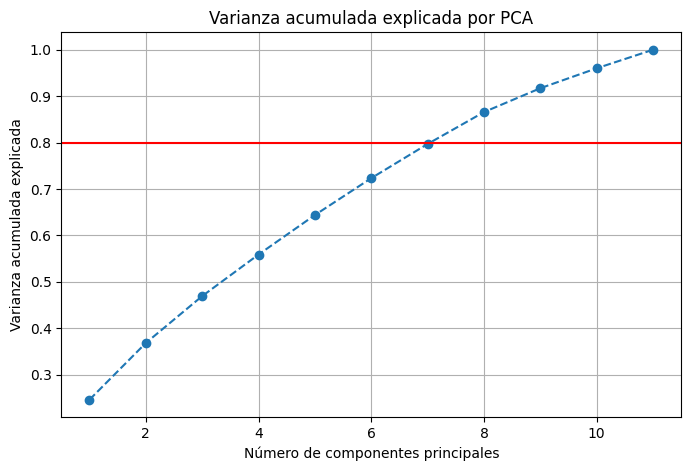

Se necesitan 8 dimensiones para explicar al menos el 80% de la varianza.


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# PCA con todos los componentes
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza acumulada
explained_var = np.cumsum(pca.explained_variance_ratio_) #permite ver la varianza que tiene cada una de las componentes principales

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='-')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada explicada')
plt.title('Varianza acumulada explicada por PCA')
plt.grid(True)
plt.show()

n_dims_90 = np.argmax(explained_var >= 0.8) + 1  # +1 porque los índices empiezan en 0
print(f'Se necesitan {n_dims_90} dimensiones para explicar al menos el 80% de la varianza.')

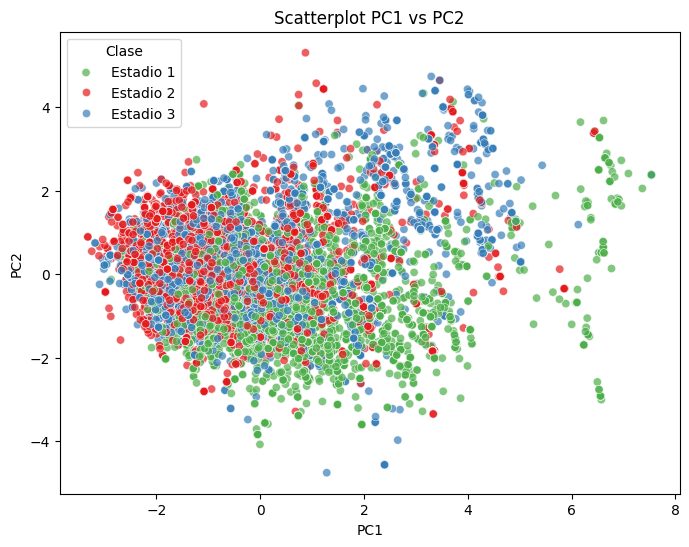

In [ ]:
# Scatterplot PC1 vs PC2
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train, palette='Set1', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot PC1 vs PC2')
plt.legend(title='Clase', labels=['Estadio 1', 'Estadio 2','Estadio 3'])
plt.show()

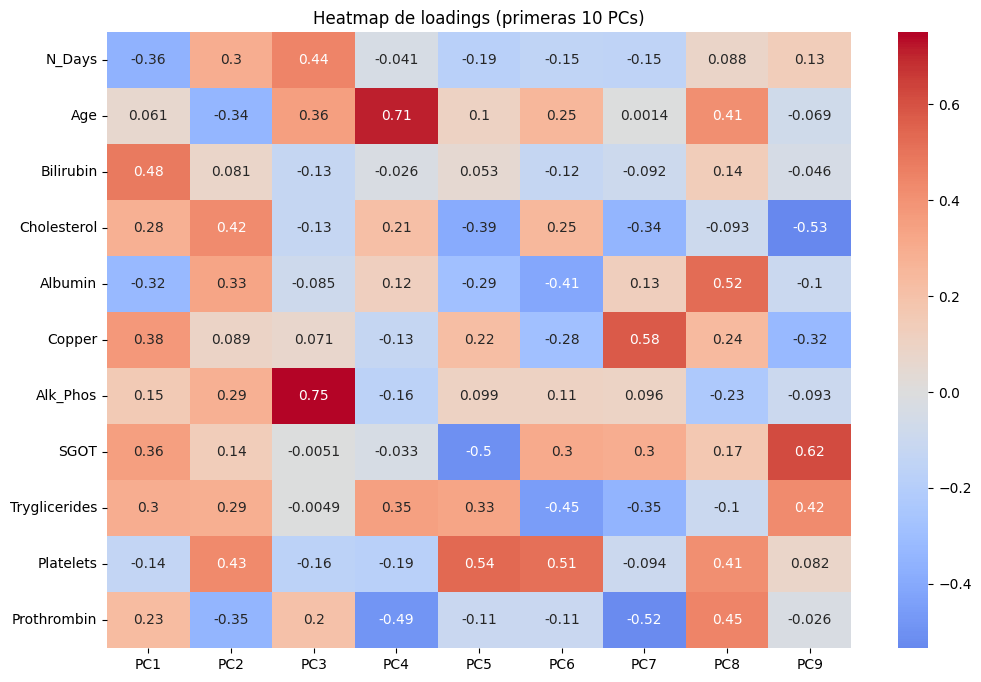

Número de componentes principales para explicar 80% varianza: 8
Varianza explicada acumulada por estas componentes: 86.5682


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],  # ✅ Número real de PCs
    index=X_train.columns
)

plt.figure(figsize=(12,8))
sns.heatmap(loadings.iloc[:,:9], annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de loadings (primeras 9 PCs)')
plt.show()

# Aplicar PCA
pca = PCA(n_components=0.80)  # Selecciona número mínimo de PCs que expliquen 90% de la varianza
X_pca = pca.fit_transform(X_scaled)

print(f"Número de componentes principales para explicar 80% varianza: {pca.n_components_}")
print(f"Varianza explicada acumulada por estas componentes: {sum(pca.explained_variance_ratio_)*100:.4f}")

### **3.2.1. Análisis MCA y PCA :**

Tras aplicar el Análisis de Correspondencias Múltiples (MCA), se determinó que seis dimensiones son suficientes para explicar el 80 % de la varianza. Asimismo, se identificó que las variables que más influyen en las dos primeras dimensiones son edema, ascitis y arañas vasculares, todas en su categoría positiva (Y). Por otro lado, el Análisis de Componentes Principales (PCA) indicó que se requieren ocho componentes principales para explicar el mismo porcentaje de varianza, observándose que, en general, todas las variables numéricas presentan un nivel de contribución adecuado en las primeras ocho componentes. A partir de estas nuevas variables generadas, se construyó un nuevo conjunto de datos que será utilizado para la evaluación de distintos modelos de clasificación.

## **3.3. Concatenar las dos matrices**

In [ ]:
!pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
import prince

In [ ]:
# Datos numéricos

# Escalar variables numéricas del entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit solo al train

# Ajustar PCA al conjunto de entrenamiento
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_scaled)

# Escalar el conjunto de prueba con el mismo scaler del entrenamiento
X_test_scaled = scaler.transform(X_test)  # sin fit

# Aplicar PCA ya entrenado al conjunto de prueba
X_test_pca = pca.transform(X_test_scaled)  # sin fit

In [ ]:
# Datos categóricos

# Fit solo con entrenamiento
mca = prince.MCA(n_components=6, random_state=42)
mca = mca.fit(X_train_encoded)

# Transformación sobre entrenamiento y prueba
X_train_mca = mca.transform(X_train_encoded)
X_test_mca = mca.transform(X_test_encoded)

In [ ]:
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PCA_{i+1}' for i in range(X_train_pca.shape[1])])
X_train_mca_df = pd.DataFrame(X_train_mca.values, columns=[f'MCA_{i+1}' for i in range(X_train_mca.shape[1])])

X_train_final = pd.concat([X_train_pca_df, X_train_mca_df], axis=1)

In [ ]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16750 entries, 0 to 16749
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCA_1   16750 non-null  float64
 1   PCA_2   16750 non-null  float64
 2   PCA_3   16750 non-null  float64
 3   PCA_4   16750 non-null  float64
 4   PCA_5   16750 non-null  float64
 5   PCA_6   16750 non-null  float64
 6   PCA_7   16750 non-null  float64
 7   PCA_8   16750 non-null  float64
 8   MCA_1   16750 non-null  float64
 9   MCA_2   16750 non-null  float64
 10  MCA_3   16750 non-null  float64
 11  MCA_4   16750 non-null  float64
 12  MCA_5   16750 non-null  float64
 13  MCA_6   16750 non-null  float64
dtypes: float64(14)
memory usage: 1.8 MB


In [ ]:
# para el conjunto de prueba

X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PCA_{i+1}' for i in range(X_test_pca.shape[1])])
X_test_mca_df = pd.DataFrame(X_test_mca.values, columns=[f'MCA_{i+1}' for i in range(X_test_mca.shape[1])])

X_test_final = pd.concat([X_test_pca_df, X_test_mca_df], axis=1)

In [ ]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCA_1   8250 non-null   float64
 1   PCA_2   8250 non-null   float64
 2   PCA_3   8250 non-null   float64
 3   PCA_4   8250 non-null   float64
 4   PCA_5   8250 non-null   float64
 5   PCA_6   8250 non-null   float64
 6   PCA_7   8250 non-null   float64
 7   PCA_8   8250 non-null   float64
 8   MCA_1   8250 non-null   float64
 9   MCA_2   8250 non-null   float64
 10  MCA_3   8250 non-null   float64
 11  MCA_4   8250 non-null   float64
 12  MCA_5   8250 non-null   float64
 13  MCA_6   8250 non-null   float64
dtypes: float64(14)
memory usage: 902.5 KB


## **3.4. Modelado**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    #'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss') #genera un error por la etiqueta de la variable rta
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_final, y_train, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f} accuracy")

Logistic Regression: 0.5655 accuracy
KNN: 0.8769 accuracy
SVC: 0.7856 accuracy
Decision Tree: 0.8538 accuracy
Random Forest: 0.9009 accuracy


## **3.5. Ajuste de hiperparámetros**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [ ]:
from sklearn.linear_model import LogisticRegression

param_dist = {
    'C': uniform(0.01, 10),
    'solver': ['lbfgs', 'saga'],
    'multi_class': ['multinomial']
}

log_reg = LogisticRegression(max_iter=1000)
random_log = RandomizedSearchCV(log_reg, param_distributions=param_dist, n_iter=20,
                                cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
random_log.fit(X_train_final, y_train)
print("Logistic Regression - Best Params:", random_log.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Logistic Regression - Best Params: {'C': np.float64(0.017787658410143285), 'multi_class': 'multinomial', 'solver': 'saga'}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_dist = {
    'n_neighbors': randint(3, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
random_knn = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=20,
                                cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
random_knn.fit(X_train_final, y_train)
print("KNN - Best Params:", random_knn.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
KNN - Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_dist = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'criterion': ['gini', 'entropy']
}

tree = DecisionTreeClassifier()
random_tree = RandomizedSearchCV(tree, param_distributions=param_dist, n_iter=20,
                                 cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
random_tree.fit(X_train_final, y_train)
print("Decision Tree - Best Params:", random_tree.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Decision Tree - Best Params: {'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 4}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier()
random_rf = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20,
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
random_rf.fit(X_train_final, y_train)
print("Random Forest - Best Params:", random_rf.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Forest - Best Params: {'max_depth': 21, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 269}


In [ ]:
from sklearn.svm import SVC

param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm = SVC()
random_svm = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=20,
                                cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
random_svm.fit(X_train_final, y_train)
print("SVM - Best Params:", random_svm.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
SVM - Best Params: {'C': np.float64(8.431949117361643), 'gamma': 'scale', 'kernel': 'rbf'}


## **3.6. Comparación entre los modelos con los mejores hiperparámetros**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

In [ ]:
modelos_optimizados = {
    "Logistic Regression": random_log.best_estimator_,
    "KNN": random_knn.best_estimator_,
    "Decision Tree": random_tree.best_estimator_,
    "Random Forest": random_rf.best_estimator_,
    "SVM": random_svm.best_estimator_
}

In [ ]:
# Guardamos resultados
resultados = []

for nombre, modelo in modelos_optimizados.items():
    # Validación cruzada (solo en el entrenamiento)
    scores_cv = cross_val_score(modelo, X_train_final, y_train, cv=5, scoring='accuracy')
    mean_cv = scores_cv.mean()
    std_cv = scores_cv.std()

    # Ajuste final sobre el entrenamiento completo (opcional, algunos modelos ya están entrenados)
    modelo.fit(X_train_final, y_train)

    # Evaluación en el conjunto de prueba
    y_pred = modelo.predict(X_test_final)
    acc_test = accuracy_score(y_test, y_pred)

    # Guardamos métricas
    resultados.append({
        'Modelo': nombre,
        'Accuracy CV (media)': round(mean_cv, 4),
        'Accuracy CV (std)': round(std_cv, 4),
        'Accuracy Test': round(acc_test, 4)
    })

    # Reporte detallado
    print(f"\n📌 Modelo: {nombre}")
    print(f"✅ Accuracy CV: {mean_cv:.4f} ± {std_cv:.4f}")
    print(f"✅ Accuracy Test: {acc_test:.4f}")
    print("📋 Classification Report:\n", classification_report(y_test, y_pred))
    print("🧩 Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))


📌 Modelo: Logistic Regression
✅ Accuracy CV: 0.5688 ± 0.0048
✅ Accuracy Test: 0.5749
📋 Classification Report:
               precision    recall  f1-score   support

           1       0.56      0.62      0.59      2727
           2       0.49      0.40      0.44      2786
           3       0.65      0.71      0.68      2737

    accuracy                           0.57      8250
   macro avg       0.57      0.58      0.57      8250
weighted avg       0.57      0.57      0.57      8250

🧩 Matriz de Confusión:
 [[1690  646  391]
 [1020 1122  644]
 [ 294  512 1931]]

📌 Modelo: KNN
✅ Accuracy CV: 0.9050 ± 0.0037
✅ Accuracy Test: 0.9115
📋 Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.90      0.90      2727
           2       0.89      0.91      0.90      2786
           3       0.94      0.92      0.93      2737

    accuracy                           0.91      8250
   macro avg       0.91      0.91      0.91      8250
weight

In [ ]:
# Mostrar resumen
df_resultados = pd.DataFrame(resultados).sort_values(by='Accuracy Test', ascending=False)
print("\n✅ Resumen Comparativo de Modelos:\n")
print(df_resultados)


✅ Resumen Comparativo de Modelos:

                Modelo  Accuracy CV (media)  Accuracy CV (std)  Accuracy Test
3        Random Forest               0.9012             0.0037         0.9135
1                  KNN               0.9050             0.0037         0.9115
2        Decision Tree               0.8517             0.0061         0.8698
4                  SVM               0.8521             0.0032         0.8615
0  Logistic Regression               0.5688             0.0048         0.5749


### **3.6.1 Conclusión Parcial MCA - PCA**
**Análisis:** Tras evaluar los distintos modelos de clasificación utilizando sus mejores hiperparámetros, se concluye que los algoritmos que obtienen el mayor valor de accuracy son Random Forest (0.9135) y KNN (0.9115). En contraste, el modelo de regresión logística (Softmax: 0.0575) resulta ser el menos adecuado para la tarea de clasificación del estadío, al presentar el menor rendimiento en términos de accuracy. Con base en estos resultados, se determina que el modelo más apropiado para utilizar con el conjunto de datos generado mediante PCA y MCA es Random Forest.

# **4. RFE-CV**

In [155]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
# from numpy import mean # Commented out to avoid conflict
# from numpy import std # Commented out to avoid conflict
import numpy as np # Import numpy with an alias

In [156]:
#Definir el dataset

df_num=df.select_dtypes(include=['int64','float64'])
df_num.info()

# Concatenate numerical and categorical dataframes

X = pd.concat([df_num, df_cat.drop('Stage', axis=1)], axis=1)
y = df_cat['Stage']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=1) #### Verificar estratificado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Age            25000 non-null  int64  
 2   Bilirubin      25000 non-null  float64
 3   Cholesterol    25000 non-null  float64
 4   Albumin        25000 non-null  float64
 5   Copper         25000 non-null  float64
 6   Alk_Phos       25000 non-null  float64
 7   SGOT           25000 non-null  float64
 8   Tryglicerides  25000 non-null  float64
 9   Platelets      25000 non-null  float64
 10  Prothrombin    25000 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 2.1 MB


In [162]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
import numpy as np
import pandas as pd


# Define variables categóricas y numéricas

dfcat= df_cat.drop('Stage', axis=1)


categorical_features = dfcat.columns.tolist()
numerical_features = df_num.columns.tolist()

# Separar X e y
X = df[categorical_features + numerical_features]
y = df_cat['Stage']

# Partición train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y)

# Preprocesador para codificar categóricas y pasar numéricas tal cual
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

In [163]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np
# Definir modelos a evaluar
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}
# Diccionarios para guardar resultados
results = {}
selected_features = {}
selected_feature_names = {}


for name, model in models.items():
    print(f"\nEvaluando modelo: {name}")

    # RFECV con validación cruzada interna
    rfe = RFECV(
        estimator=model,
        step=1,
        cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
        scoring='accuracy',
        n_jobs=-1
    )

    # Pipeline completo
    pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Debe ser un ColumnTransformer
        ('feature_selection', rfe),
        ('model', model)
    ])

    # Entrenar pipeline
    pipeline.fit(X_train, y_train)

    # Evaluar en test
    accuracy_test = pipeline.score(X_test, y_test)
    print(f"Accuracy en test set: {accuracy_test:.3f}")

    # Obtener variables seleccionadas
    mask = pipeline.named_steps['feature_selection'].support_
    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
    selected_names = feature_names[mask]

    # Guardar resultados
    results[name] = accuracy_test
    selected_features[name] = len(selected_names)
    selected_feature_names[name] = selected_names

    # Mostrar resumen por modelo
    print(f"Variables seleccionadas por {name}: {len(selected_names)}")
    print(f"Nombres: {list(selected_names)}")

# Mostrar resumen final
print("\nResumen final:")
for name in models:
    print(f"\nModelo: {name}")
    print(f"Accuracy: {results[name]:.3f}")
    print(f"Variables seleccionadas: {selected_features[name]}")
    print(f"Nombres: {list(selected_feature_names[name])}")


Evaluando modelo: Decision Tree
Accuracy en test set: 0.922
Variables seleccionadas por Decision Tree: 3
Nombres: ['num__N_Days', 'num__Albumin', 'num__Prothrombin']

Evaluando modelo: Random Forest
Accuracy en test set: 0.946
Variables seleccionadas por Random Forest: 6
Nombres: ['num__N_Days', 'num__Age', 'num__Bilirubin', 'num__Albumin', 'num__Platelets', 'num__Prothrombin']

Evaluando modelo: Logistic Regression
Accuracy en test set: 0.580
Variables seleccionadas por Logistic Regression: 25
Nombres: ['num__N_Days', 'num__Bilirubin', 'num__Cholesterol', 'num__Albumin', 'num__Copper', 'num__SGOT', 'num__Tryglicerides', 'num__Platelets', 'num__Prothrombin', 'cat__Status_C', 'cat__Status_CL', 'cat__Status_D', 'cat__Drug_D-penicillamine', 'cat__Drug_Placebo', 'cat__Sex_F', 'cat__Sex_M', 'cat__Ascites_N', 'cat__Ascites_Y', 'cat__Hepatomegaly_N', 'cat__Hepatomegaly_Y', 'cat__Spiders_N', 'cat__Spiders_Y', 'cat__Edema_N', 'cat__Edema_S', 'cat__Edema_Y']

Resumen final:

Modelo: Decision Tr

## **4.1 Conclusión Parcial RFE:**

Tras aplicar la eliminación recursiva de variables con validación cruzada (RFE-CV), se determinó que el mejor rendimiento en términos de accuracy se obtiene utilizando el modelo Random Forest (0.946) para la clasificación del estadío. En este caso, el número óptimo de variables seleccionadas fue seis, correspondientes a: número de días, edad, bilirrubina, albúmina, plaquetas y protrombina.

Cabe destacar que, en escenarios con capacidad de procesamiento limitada, una alternativa viable sería el uso de un árbol de decisión, ya que este modelo logra reducir el número de variables a solo tres, sin afectar de forma significativa el valor del accuracy (0.922).

Por otro lado, se evidencia que el modelo de regresión logística no resulta adecuado para la clasificación, ya que obtuvo el rendimiento más bajo en términos de accuracy (0.580).

# **Conclusiónes**

En el conjunto de datos para la clasificación de los estadios de la cirrosis hepática, el mejor desempeño en accuracy (95 %) se obtuvo aplicando la reducción de variables categóricas mediante Chi² y utilizando todas las variables numéricas en un modelo Random Forest.

En segundo lugar, con un accuracy de 94,6 %, se destacó el modelo Random Forest empleando la estrategia de eliminación recursiva de variables con validación cruzada, seleccionando 6 variables.

Con esta misma estrategia, el modelo de árboles de decisión alcanzó un accuracy de 92,2 % utilizando únicamente 3 variables. Sin embargo, se recomienda priorizar el uso de Random Forest, ya que el empleo de solo 3 variables podría conllevar pérdida de información relevante.

En otros métodos de reducción de dimensionalidad, como MCA y PCA, el modelo Random Forest también presentó un buen rendimiento, con un accuracy de 91,35 %.

Por su parte, utilizando las técnicas de Chi², Información Mutua y ANOVA F-Test, el modelo de árboles de decisión obtuvo un accuracy de 91,89 %, siendo una alternativa competitiva.

Finalmente, con regresión logística Softmax, en ninguno de los escenarios evaluados se alcanzó un buen desempeño: todos los valores de accuracy fueron inferiores al 60 %, por lo que no se recomienda este modelo para este conjunto de datos.